## Acquisition Analytics : Bank Marketing

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [4]:
# to avoid un neccessary warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = 300

In [5]:
##from google.colab import files
##uploaded = files.upload()

In [6]:
##from google.colab import files
##uploaded = files.upload()

In [7]:
# importing neccessory library for analysing data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the two CSV files
CreditBureau = pd.read_csv('Credit Bureau data.csv', sep = ",")
demographics = pd.read_csv('Demographic data.csv', sep = ",")

In [8]:
print (CreditBureau.shape)
print (demographics.shape)


(71295, 19)
(71295, 12)


In [9]:
print (CreditBureau.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

There are 11 independent variabe and 1 dependent variable "Performance.Tag", 
with 7 integer and 5 categorical variables.

In [10]:
print (demographics.info)

<bound method DataFrame.info of        Application ID  Age Gender Marital Status (at the time of application)  \
0           954457215   48      F                                     Married   
1           432830445   31      M                                     Married   
2           941387308   32      M                                      Single   
3           392161677   43      M                                     Married   
4           182011211   35      F                                     Married   
5           312196805   20      M                                     Married   
6           532217204   42      M                                     Married   
7            74788849   34      M                                     Married   
8           782743811   30      M                                     Married   
9            96964957   22      M                                      Single   
10          547975524   37      M                                     Married

There are 18 independent variable and 1 dependent variable "Performance.Tag", 
and all variables are of integer type 

In [11]:
### Check if there are any rows which are not there in Demographics dataset with a particular Application ID
print(list(set(CreditBureau['Application ID'])-set(demographics['Application ID'])))

[]


### Identifying Data quality issues

In [12]:
CreditBureau.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [13]:
demographics.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [14]:
# idendifing and deleting duplicate Application ID from data frame
#Removing both entries of duplicate application ids as it is not possible to identify the correct entry among duplicates

CreditBureau = CreditBureau.drop_duplicates(['Application ID'], keep='last')   
demographics = demographics.drop_duplicates(['Application ID'], keep='last')   


In [15]:
# selecting rows based on condition 
rejected_credit = CreditBureau[CreditBureau['Performance Tag'].isnull() ] 
rejected_credit = demographics[demographics['Performance Tag'].isnull() ] 

In [16]:
rejected_credit.shape

(1425, 12)

In [17]:
CreditBureau = CreditBureau[CreditBureau['Performance Tag'].notnull()]
demographics = demographics[demographics['Performance Tag'].notnull()]

In [18]:
CreditBureau.shape

(69867, 19)

We have 69870 row of data for process

In [19]:
# Taking backup of the datasets
credit_wo_woe = CreditBureau
demo_wo_woe = demographics

In [20]:
credit_wo_woe.head()

Application ID  No of times 90 DPD or worse in last 6 months  \
0       954457215                                             0   
1       432830445                                             0   
2       941387308                                             0   
3       392161677                                             0   
4       182011211                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0               

### Exploratory data analysis

###### UNIVARIATE ANALYSIS 

[]

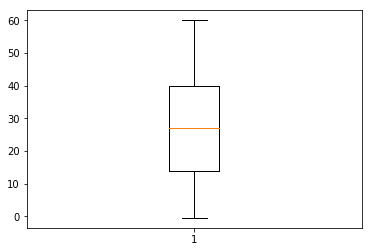

In [18]:
plt.boxplot(demo_wo_woe['Income'])
plt.plot()
#Print(demo_wo_woe['Income'].sum)

27.0


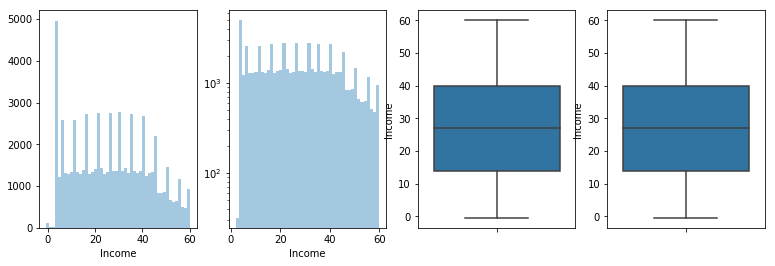

In [19]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_wo_woe.Income.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_wo_woe.Income.dropna()[demo_wo_woe.Income > 1], kde=False, ax=axs[1])
sns.boxplot(demo_wo_woe.Income, ax=axs[2], orient = 'v')
sns.boxplot(demo_wo_woe.Income, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_wo_woe.loc[:,"Income"].median())

Median income of applicants is 27 units and there are no outliers

45.0


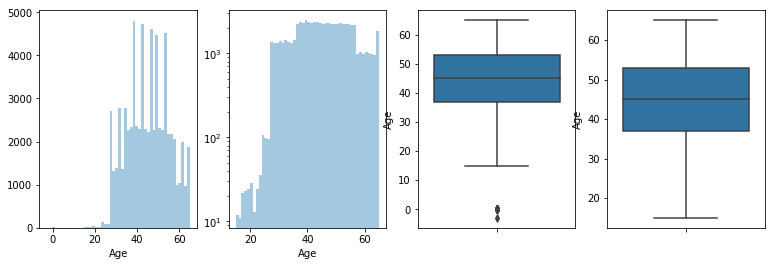

In [20]:
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_wo_woe.Age.dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_wo_woe.Age.dropna()[demo_wo_woe.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_wo_woe.Age, ax=axs[2], orient = 'v')
sns.boxplot(demo_wo_woe.Age, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_wo_woe.loc[:,"Age"].median())

Median Age of applicants is 45 years and there are few outliers

10.0


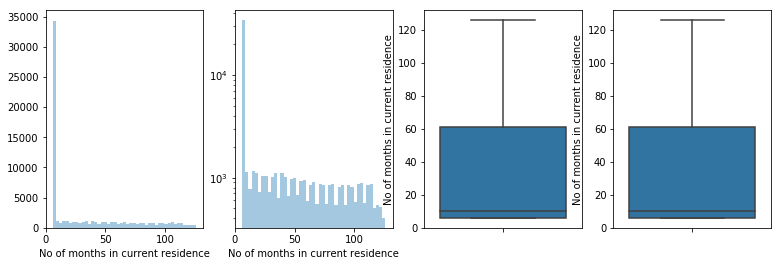

In [21]:
##No.of.months.in.current.residence

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_wo_woe['No of months in current residence'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_wo_woe['No of months in current residence'].dropna()[demo_wo_woe.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_wo_woe['No of months in current residence'], ax=axs[2], orient = 'v')
sns.boxplot(demo_wo_woe['No of months in current residence'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_wo_woe.loc[:,"No of months in current residence"].median())

34.0


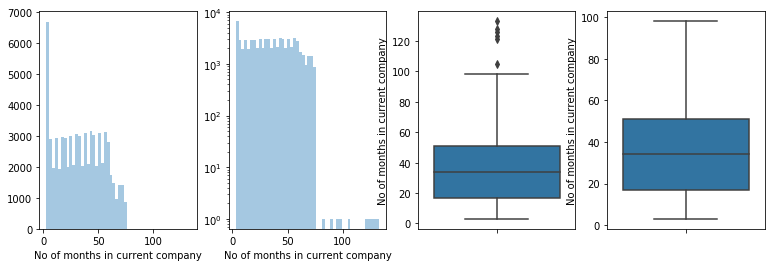

In [22]:
##No of months in current company

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_wo_woe['No of months in current company'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_wo_woe['No of months in current company'].dropna()[demo_wo_woe.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_wo_woe['No of months in current company'], ax=axs[2], orient = 'v')
sns.boxplot(demo_wo_woe['No of months in current company'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_wo_woe.loc[:,"No of months in current company"].median())

3.0


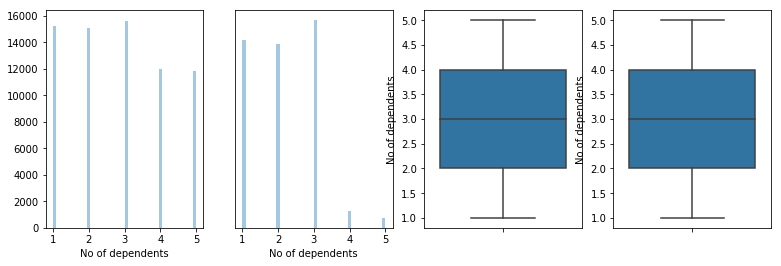

In [23]:
##No of dependents

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(demo_wo_woe['No of dependents'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(demo_wo_woe['No of dependents'].dropna()[demo_wo_woe.Age > 1], kde=False, ax=axs[1])
sns.boxplot(demo_wo_woe['No of dependents'], ax=axs[2], orient = 'v')
sns.boxplot(demo_wo_woe['No of dependents'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (demo_wo_woe.loc[:,"No of dependents"].median())

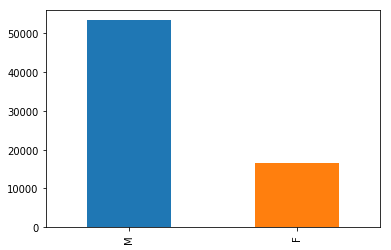

In [24]:
demo_wo_woe['Gender'].value_counts().head(10).plot.bar()

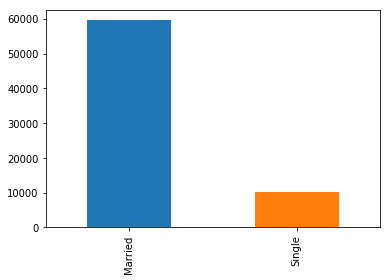

In [25]:
demo_wo_woe['Marital Status (at the time of application)'].value_counts().head(10).plot.bar()

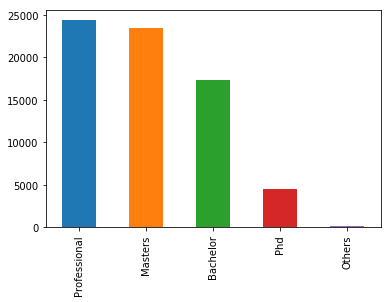

In [26]:
demo_wo_woe['Education'].value_counts().head(10).plot.bar()

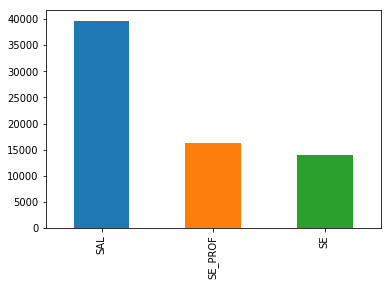

In [27]:
demo_wo_woe = demo_wo_woe.rename(columns = {"Profession ": "Profession"}) 
demo_wo_woe['Profession'].value_counts().head(10).plot.bar()

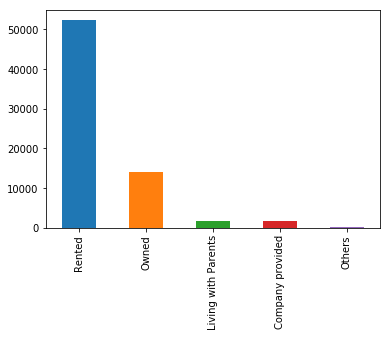

In [28]:
demo_wo_woe['Type of residence'].value_counts().head(10).plot.bar()

#### Uni Variate analysis for Credit bureau data data

0.0


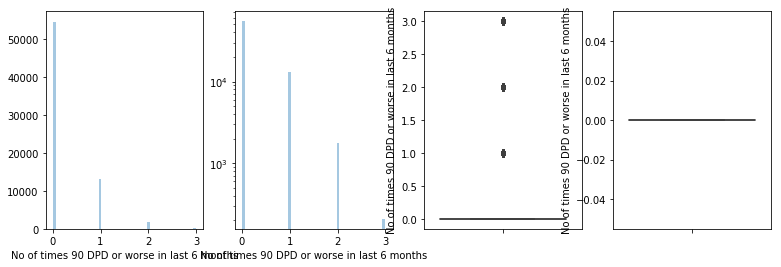

In [29]:
## No of times 90 DPD or worse in last 6 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 90 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 90 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 90 DPD or worse in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 90 DPD or worse in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 90 DPD or worse in last 6 months"].median())

0.0


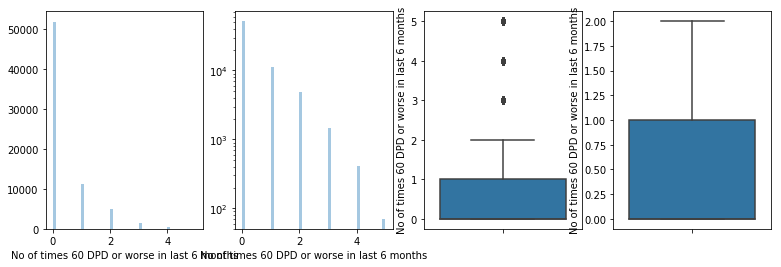

In [30]:
## No of times 60 DPD or worse in last 6 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 60 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 60 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 60 DPD or worse in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 60 DPD or worse in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 60 DPD or worse in last 6 months"].median())

0.0


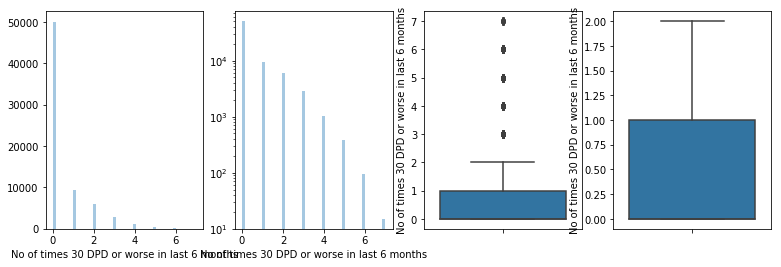

In [31]:
## No of times 30 DPD or worse in last 6 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 30 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 30 DPD or worse in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 30 DPD or worse in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 30 DPD or worse in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 30 DPD or worse in last 6 months"].median())

0.0


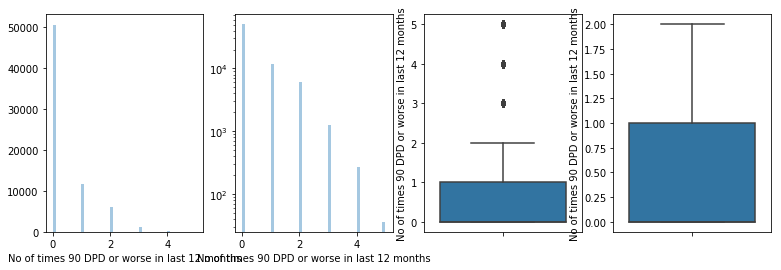

In [32]:
## No of times 90 DPD or worse in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 90 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 90 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 90 DPD or worse in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 90 DPD or worse in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 90 DPD or worse in last 12 months"].median())

0.0


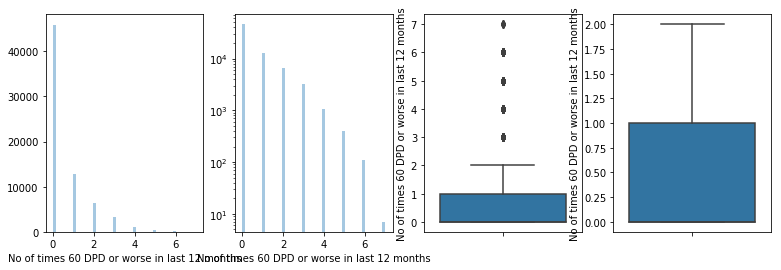

In [33]:
## No of times 60 DPD or worse in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 60 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 60 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 60 DPD or worse in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 60 DPD or worse in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 60 DPD or worse in last 12 months"].median())

0.0


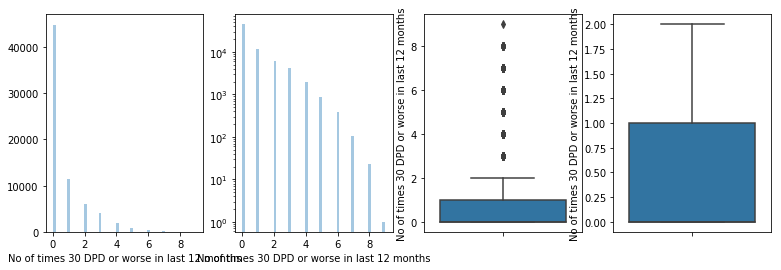

In [34]:
## No of times 90 DPD or worse in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of times 30 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of times 30 DPD or worse in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of times 30 DPD or worse in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of times 30 DPD or worse in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of times 30 DPD or worse in last 12 months"].median())

15.0


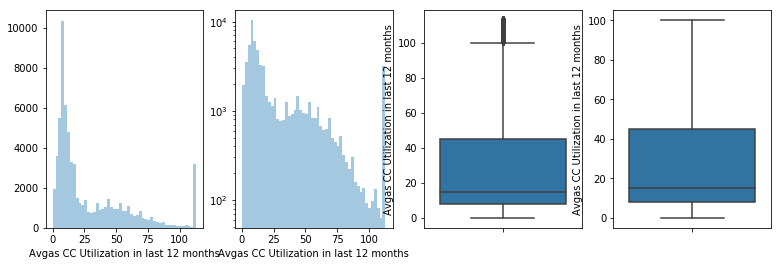

In [35]:
# Avgas CC Utilization in last 12 months
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['Avgas CC Utilization in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['Avgas CC Utilization in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['Avgas CC Utilization in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['Avgas CC Utilization in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"Avgas CC Utilization in last 12 months"].median())

2.0


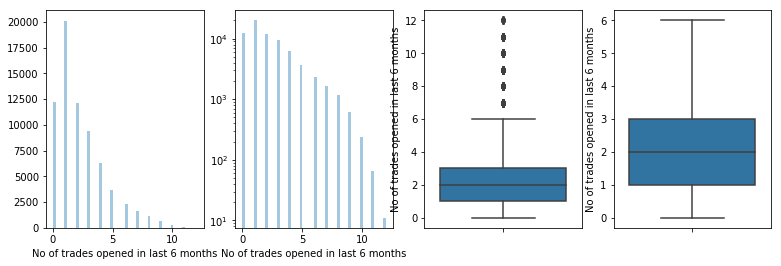

In [36]:
# No of trades opened in last 6 months
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of trades opened in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of trades opened in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of trades opened in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of trades opened in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of trades opened in last 6 months"].median())

4.0


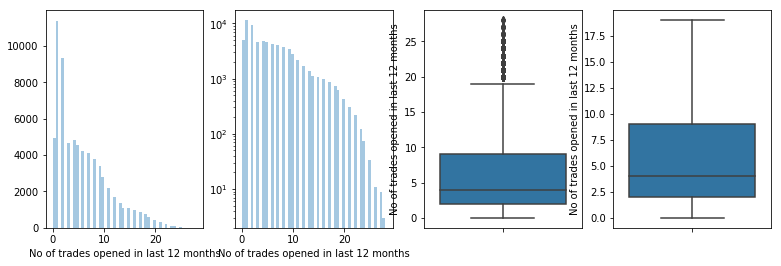

In [37]:
# No of trades opened in last 12 months
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of trades opened in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of trades opened in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of trades opened in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of trades opened in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of trades opened in last 12 months"].median())

6.0


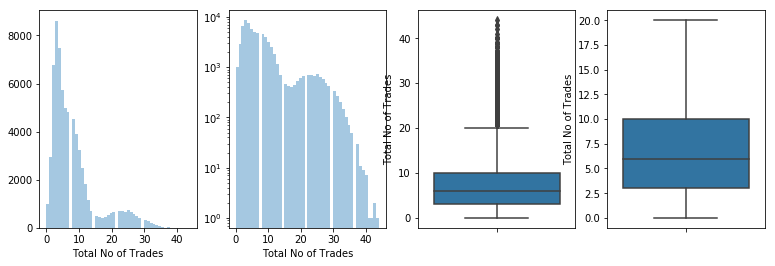

In [38]:
# Total No of Trades 
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['Total No of Trades'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['Total No of Trades'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['Total No of Trades'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['Total No of Trades'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"Total No of Trades"].median())

2.0


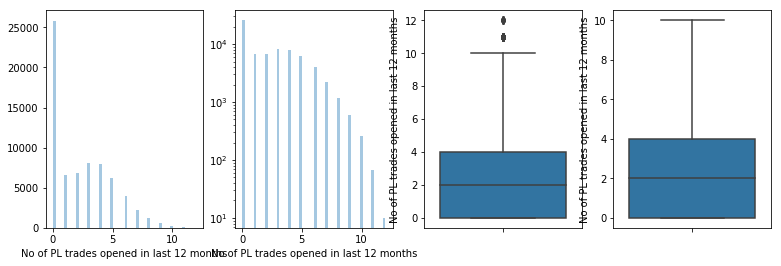

In [39]:
# No of PL trades opened in last 12 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of PL trades opened in last 12 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of PL trades opened in last 12 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of PL trades opened in last 12 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of PL trades opened in last 12 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of PL trades opened in last 12 months"].median())

1.0


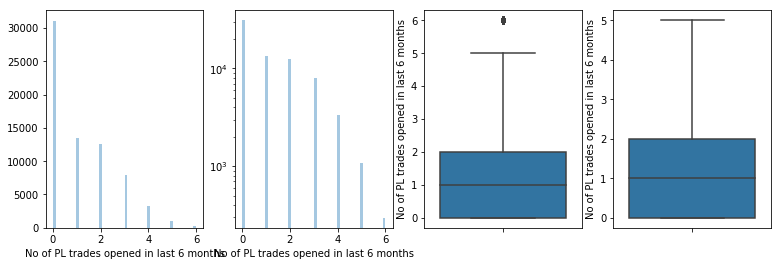

In [40]:
# No of PL trades opened in last 6 months

Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of PL trades opened in last 6 months'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of PL trades opened in last 6 months'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of PL trades opened in last 6 months'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of PL trades opened in last 6 months'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of PL trades opened in last 6 months"].median())

1.0


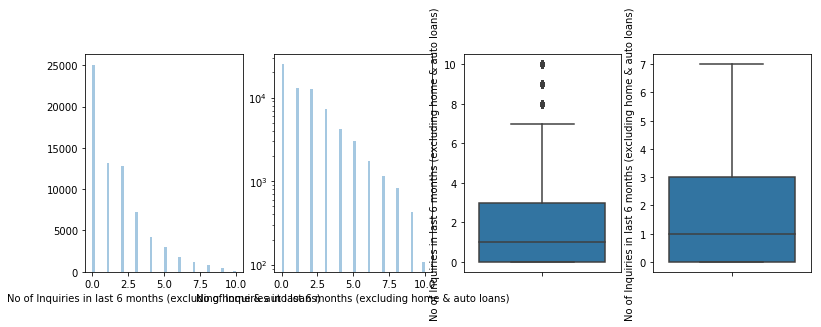

In [41]:
#No of Inquiries in last 6 months  excluding home   auto loans 
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of Inquiries in last 6 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of Inquiries in last 6 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of Inquiries in last 6 months (excluding home & auto loans)'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of Inquiries in last 6 months (excluding home & auto loans)'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of Inquiries in last 6 months (excluding home & auto loans)"].median())


3.0


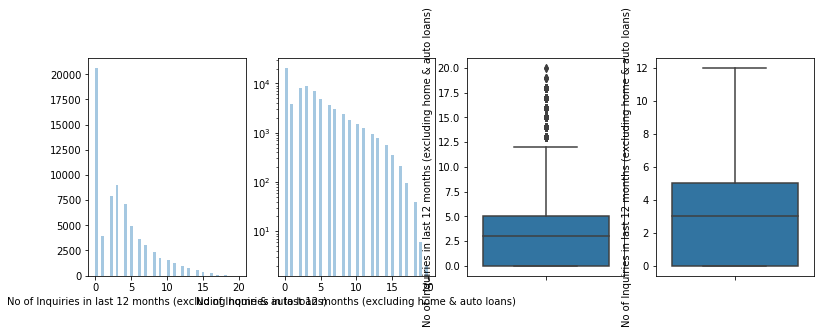

In [42]:
#No of Inquiries in last 12 months  excluding home   auto loans 
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['No of Inquiries in last 12 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['No of Inquiries in last 12 months (excluding home & auto loans)'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['No of Inquiries in last 12 months (excluding home & auto loans)'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['No of Inquiries in last 12 months (excluding home & auto loans)'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"No of Inquiries in last 12 months (excluding home & auto loans)"].median())

774241.0


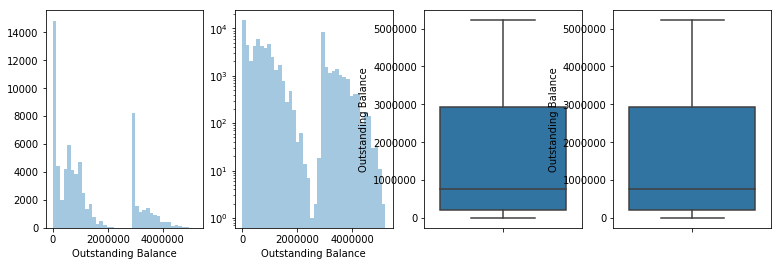

In [43]:
#Outstanding Balance
Global_Salesfig, axs = plt.subplots(ncols = 4, figsize=(13, 4))

sns.distplot(CreditBureau['Outstanding Balance'].dropna(), kde=False, ax=axs[0])
second_plt = sns.distplot(CreditBureau['Outstanding Balance'].dropna(), kde=False, ax=axs[1])
sns.boxplot(CreditBureau['Outstanding Balance'], ax=axs[2], orient = 'v')
sns.boxplot(CreditBureau['Outstanding Balance'], ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

print (CreditBureau.loc[:,"Outstanding Balance"].median())

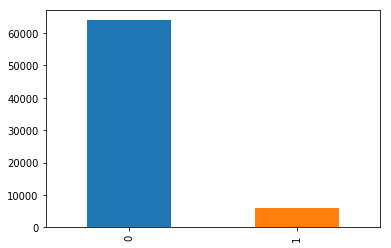

In [44]:
CreditBureau['Presence of open auto loan'].value_counts().head(10).plot.bar()

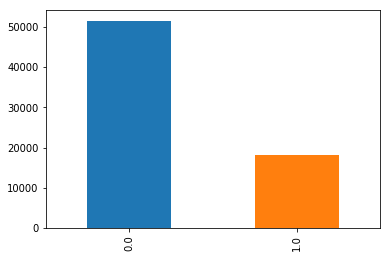

In [45]:
CreditBureau['Presence of open home loan'].value_counts().head(10).plot.bar()

### BIVARIATE ANALYSIS

#### Demographic data

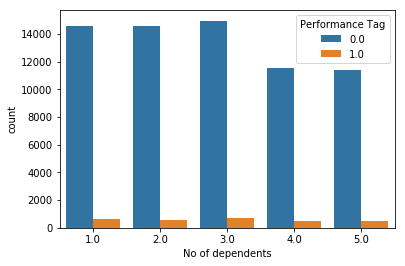

In [46]:
p = sns.countplot(data=demo_wo_woe, x = 'No of dependents',hue = 'Performance Tag')

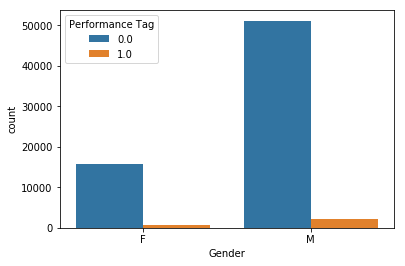

In [47]:
p = sns.countplot(data=demo_wo_woe, x = 'Gender',hue = 'Performance Tag')

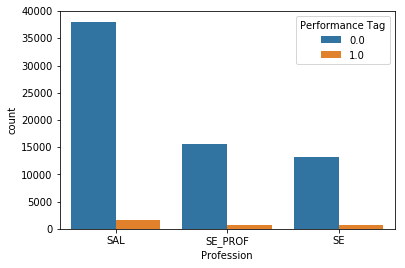

In [48]:
p = sns.countplot(data=demo_wo_woe, x = 'Profession',hue = 'Performance Tag')

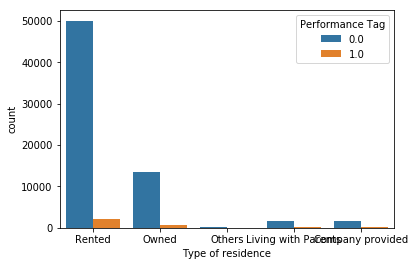

In [49]:
p = sns.countplot(data=demo_wo_woe, x = 'Type of residence',hue = 'Performance Tag')

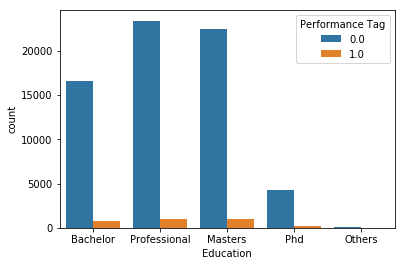

In [50]:
p = sns.countplot(data=demo_wo_woe, x = 'Education',hue = 'Performance Tag')

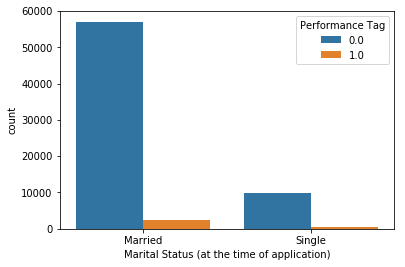

In [51]:
p = sns.countplot(data=demo_wo_woe, x = 'Marital Status (at the time of application)',hue = 'Performance Tag')

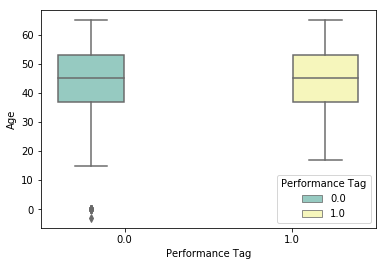

In [52]:
ax = sns.boxplot(x="Performance Tag", y="Age", hue="Performance Tag", data=demo_wo_woe, palette="Set3")

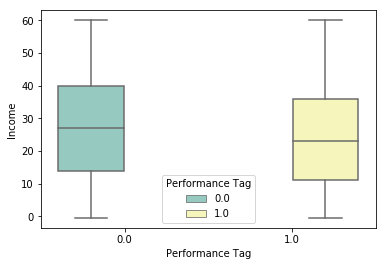

In [53]:
ax = sns.boxplot(x="Performance Tag", y="Income", hue="Performance Tag", data=demo_wo_woe, palette="Set3")

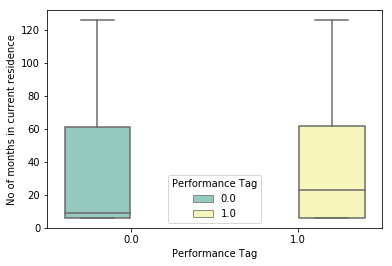

In [54]:
ax = sns.boxplot(x="Performance Tag", y="No of months in current residence", hue="Performance Tag", data=demo_wo_woe, palette="Set3")

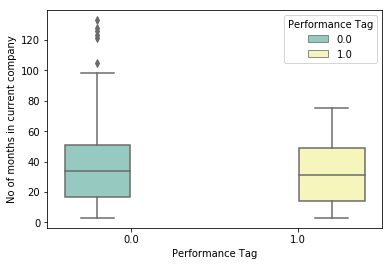

In [55]:
ax = sns.boxplot(x="Performance Tag", y="No of months in current company", hue="Performance Tag", data=demo_wo_woe, palette="Set3")

#### Bi-Variate ananlysis for CreditBureau

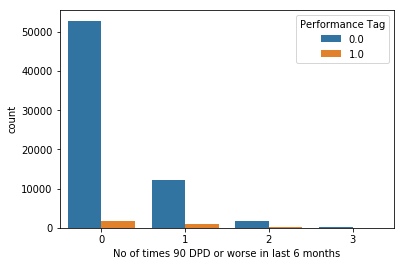

In [56]:
p = sns.countplot(data=CreditBureau, x = 'No of times 90 DPD or worse in last 6 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 90 DPD in last 6 months

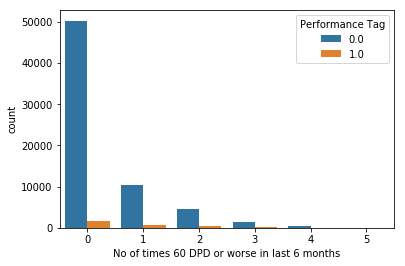

In [57]:
p = sns.countplot(data=CreditBureau, x = 'No of times 60 DPD or worse in last 6 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 60 DPD in last 6 months

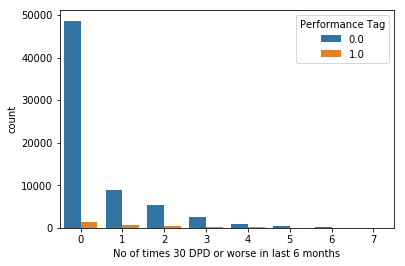

In [58]:
p = sns.countplot(data=CreditBureau, x = 'No of times 30 DPD or worse in last 6 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 30 DPD in last 6 months

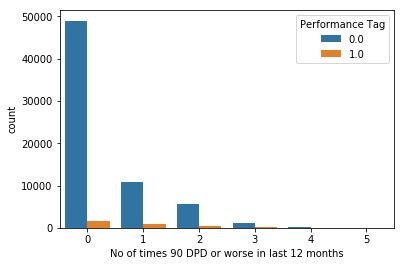

In [59]:
p = sns.countplot(data=CreditBureau, x = 'No of times 90 DPD or worse in last 12 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 90 DPD in last 12 months

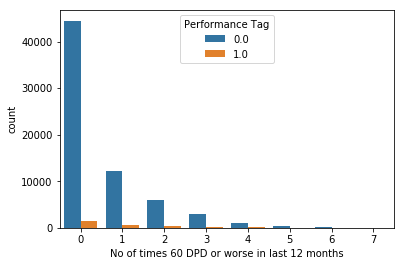

In [60]:
p = sns.countplot(data=CreditBureau, x = 'No of times 60 DPD or worse in last 12 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 60 DPD in last 12 months

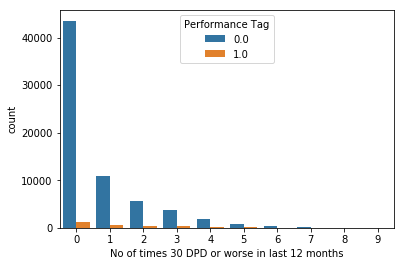

In [61]:
p = sns.countplot(data=CreditBureau, x = 'No of times 30 DPD or worse in last 12 months',hue = 'Performance Tag')
# No of defaulters are increasing with increase in no.of.times 30 DPD in last 12 months

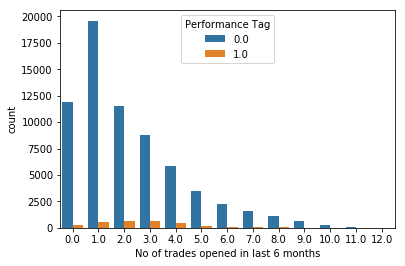

In [62]:

p = sns.countplot(data=CreditBureau, x = 'No of trades opened in last 6 months',hue = 'Performance Tag')
# Trades which are open 4 times in last 6 months tends to default more

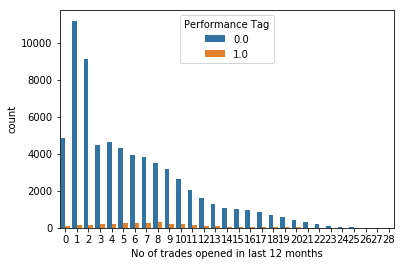

In [63]:
p = sns.countplot(data=CreditBureau, x = 'No of trades opened in last 12 months',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters with increase in No.of.trades.opened.in.last.12.months

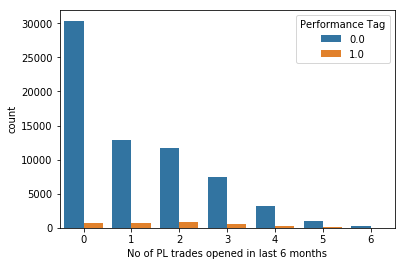

In [64]:

p = sns.countplot(data=CreditBureau, x = 'No of PL trades opened in last 6 months',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters with increase in No.of.trades.opened.in.last.12.months

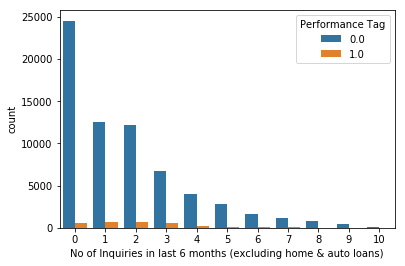

In [65]:
p = sns.countplot(data=CreditBureau, x = 'No of Inquiries in last 6 months (excluding home & auto loans)',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters 

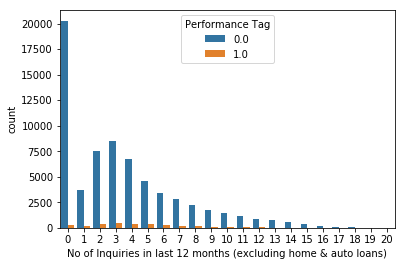

In [66]:
p = sns.countplot(data=CreditBureau, x = 'No of Inquiries in last 12 months (excluding home & auto loans)',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters 

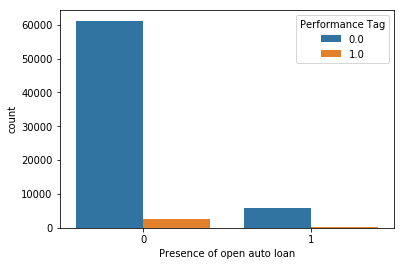

In [67]:
p = sns.countplot(data=CreditBureau, x = 'Presence of open auto loan',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters 

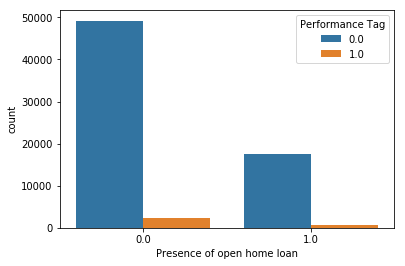

In [68]:
p = sns.countplot(data=CreditBureau, x = 'Presence of open home loan',hue = 'Performance Tag')
# No appropriate pattern found in no of defaulters 

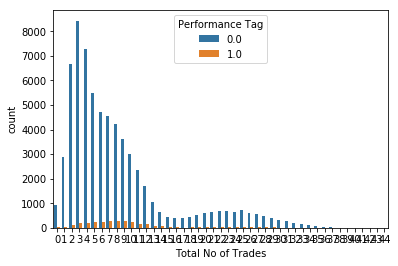

In [69]:
p = sns.countplot(data=CreditBureau, x = 'Total No of Trades',hue = 'Performance Tag')
# No appropriate pattern found in Total No of Trades

#### Finding correlation on Numerical data


### Conclusions from EDA:

  ##### 1. Demographic variables are not very good predictors of defaulting. Only below 3 variables seems significant.
      #Income
      #No.of.months.in.current.residence
      #No.of.months.in.current.company

  ##### 2. credit bureau dataset has many variables which seems like good predictors of defaulters.
      #No.of.times.90.DPD.or.worse.in.last.6.months
      #No.of.times.60.DPD.or.worse.in.last.6.months
      #No.of.times.30.DPD.or.worse.in.last.6.months
      #No.of.times.90.DPD.or.worse.in.last.12.months
      #No.of.times.60.DPD.or.worse.in.last.12.months
      #No.of.times.30.DPD.or.worse.in.last.12.months
      #No.of.trades.opened.in.last.6.months
      #No.of.PL.trades.opened.in.last.6.months
      #No.of.PL.trades.opened.in.last.12.months

  ##### 3. There is no correlation between numeric variables of demographic dataset.

  ##### 4. Few numeric variables of Credit bureau dataset show strong positive correlation with other variables.
      #The 6 variables - No.of.times 90/60/30 DPD.or.worse.in.last.6/12 months are highy correlated among themselves.
      #No of enquiries in last 6 months/12 months excluding home, auto loan variables are highly correlated.
      #No. of trade opened in 6/12 months,total number of trades, no of PL trades in 6/12 months are correlated.


In [21]:
# Taking backup of the datasets
credit_bf_model = CreditBureau
demo_bf_model = demographics

In [22]:
credit_bf_model.head()

Application ID  No of times 90 DPD or worse in last 6 months  \
0       954457215                                             0   
1       432830445                                             0   
2       941387308                                             0   
3       392161677                                             0   
4       182011211                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0               

In [23]:
demo_bf_model.head()

Application ID  Age Gender Marital Status (at the time of application)  \
0       954457215   48      F                                     Married   
1       432830445   31      M                                     Married   
2       941387308   32      M                                      Single   
3       392161677   43      M                                     Married   
4       182011211   35      F                                     Married   

   No of dependents  Income     Education Profession  Type of residence  \
0               2.0    40.0      Bachelor         SAL            Rented   
1               4.0    55.0  Professional     SE_PROF            Rented   
2               2.0    46.0      Bachelor     SE_PROF            Rented   
3               1.0    53.0      Bachelor          SE            Rented   
4               5.0    44.0  Professional         SAL            Rented   

   No of months in current residence  No of months in current company  \
0                                113                               56   
1                                112                               46   
2                                104                               49   
3                                 94                               53   
4                                112                               43   

   Performance Tag  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [24]:
credit_bf_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     69867 non-null int64
No of times 90 DPD or worse in last 6 months                       69867 non-null int64
No of times 60 DPD or worse in last 6 months                       69867 non-null int64
No of times 30 DPD or worse in last 6 months                       69867 non-null int64
No of times 90 DPD or worse in last 12 months                      69867 non-null int64
No of times 60 DPD or worse in last 12 months                      69867 non-null int64
No of times 30 DPD or worse in last 12 months                      69867 non-null int64
Avgas CC Utilization in last 12 months                             68844 non-null float64
No of trades opened in last 6 months                               69866 non-null float64
No of trades opened in last 12 months                              69867 non-null int64
No of P

In [25]:
demo_bf_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69867 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 69867 non-null int64
Age                                            69867 non-null int64
Gender                                         69865 non-null object
Marital Status (at the time of application)    69861 non-null object
No of dependents                               69864 non-null float64
Income                                         69867 non-null float64
Education                                      69749 non-null object
Profession                                     69854 non-null object
Type of residence                              69859 non-null object
No of months in current residence              69867 non-null int64
No of months in current company                69867 non-null int64
Performance Tag                                69867 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.9+ MB


In [26]:
### Printing Application ID which are not common in both the Dataframes
credit_bf_model[~credit_bf_model['Application ID'].isin(demo_bf_model['Application ID'])]

Empty DataFrame
Columns: [Application ID, No of times 90 DPD or worse in last 6 months, No of times 60 DPD or worse in last 6 months, No of times 30 DPD or worse in last 6 months, No of times 90 DPD or worse in last 12 months, No of times 60 DPD or worse in last 12 months, No of times 30 DPD or worse in last 12 months, Avgas CC Utilization in last 12 months, No of trades opened in last 6 months, No of trades opened in last 12 months, No of PL trades opened in last 6 months, No of PL trades opened in last 12 months, No of Inquiries in last 6 months (excluding home & auto loans), No of Inquiries in last 12 months (excluding home & auto loans), Presence of open home loan, Outstanding Balance, Total No of Trades, Presence of open auto loan, Performance Tag]
Index: []

###### So there are no Application ID which is not common between Demo dataset and Credit Bureau dataset






In [27]:
#### Display Unique values in all the Columns in Credit Bureau dataset
from IPython.display import HTML
for col in list(credit_bf_model):
    print('\x1b[1;31m'+col+':\x1b[0m')
    print(credit_bf_model[col].unique())

Application ID:
[954457215 432830445 941387308 ...  32481239 704812159  37493797]
No of times 90 DPD or worse in last 6 months:
[0 1 2 3]
No of times 60 DPD or worse in last 6 months:
[0 1 2 3 4 5]
No of times 30 DPD or worse in last 6 months:
[0 1 2 3 4 5 6 7]
No of times 90 DPD or worse in last 12 months:
[0 1 2 3 4 5]
No of times 60 DPD or worse in last 12 months:
[0 1 2 3 4 5 6 7]
No of times 30 DPD or worse in last 12 months:
[0 1 2 3 4 5 6 7 8 9]
Avgas CC Utilization in last 12 months:
[  4.   3.   7.  11.  12.  10.  13.   9.   6.   5.   2.  14.   0.   8.
  nan  15.   1.  16.  19.  18.  17.  20.  26.  24.  23.  22.  21.  27.
  25.  28.  29. 113.  83. 111.  43. 103.  98.  97.  37.  45.  80.  57.
  94.  40.  34.  41. 105.  59.  81.  75.  56.  88.  70.  95.  65. 102.
  85. 112.  32.  73.  58. 104.  77.  35. 100.  49. 110.  96.  79.  68.
  90.  93.  33.  60. 106.  91.  64. 107.  72.  74. 101.  39.  71.  36.
  99.  38.  84.  86.  46.  50.  48.  51.  53.  42.  66.  78.  61.  44.
  54. 

In [28]:
#### Display Unique values in all the Columns in Demographic dataset
from IPython.display import HTML
for col in list(demo_bf_model):
    print('\x1b[1;31m'+col+':\x1b[0m')
    print(demo_bf_model[col].unique())

Application ID:
[954457215 432830445 941387308 ...  32481239 704812159  37493797]
Age:
[48 31 32 43 35 20 42 34 30 22 37 41 38 33 45 51 36 29 40 19 25 28 50 27
 26 49 47 39 17 44 23 46 52 53 24 18 15 21 16 64 56 55 60 59 54 58 62 65
 61 57 63  0 -3]
Gender:
['F' 'M' nan]
Marital Status (at the time of application):
['Married' 'Single' nan]
No of dependents:
[ 2.  4.  1.  5.  3. nan]
Income:
[40.  55.  46.  53.  44.  39.  49.  48.  38.  43.  51.  54.  50.  28.
 52.  27.  37.  36.  42.  32.  24.  25.  47.  31.  33.  35.  26.  34.
 41.  45.  13.  19.  29.  18.   7.  30.  23.  21.  14.   2.  22.   3.
  6.  15.  16.  20.  11.  17.  12.   5.   4.  10.   9.  -0.5  8.   1.
  0.   4.5 60.  57.  59.  58.  56. ]
Education:
['Bachelor' 'Professional' 'Masters' 'Phd' 'Others' nan]
Profession :
['SAL' 'SE_PROF' 'SE' nan]
Type of residence:
['Rented' nan 'Owned' 'Others' 'Living with Parents' 'Company provided']
No of months in current residence:
[113 112 104  94 116 108 115 111  90  83 106  81 100 1

In [29]:
### Making a copy of the Credit DF
CBData = credit_bf_model
demoData = demo_bf_model

### WOE and IV 

In [30]:
### Function for Woe and IV
def iv_woe(data, target, bins=8, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>30):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

### Functions for Replacing Values in DF with their Respective WOE Values both where cutOFF is Float/Integer and cutOff as Interval

In [31]:
### Function for Replacing Values in a particular Variable where the CutOff is Float/Integer
def replace_cat(data, cutOff, var, newVar, val):
    data[newVar] = np.where(data[var] == cutOff, val, data[newVar])                
    return data

In [32]:
### Function for Looping through each CutOff Value in categorical variable 
def replace_on_variables(var, data, woe):
    cutOff = list(woe.Cutoff[woe.Variable == var])
    val = list(woe.WoE[woe.Variable == var])
    newVar = var + '_woe'
    data[newVar] = 0
    for i in cutOff:
        data = replace_cat(data, cutOff[i], var, newVar, val[i])
    return data

In [33]:
### Function for Replacing Values in a particular Variable where cutOff is in Interval
def replace_cat_cont(data, cutOff, var, newVar, val):
    cutOff_l = cutOff.left
    cutOff_r = cutOff.right
    data[newVar] = np.where(data[var].between(cutOff_l, cutOff_r), val, data[newVar])
    return data

In [34]:
### Function for Looping through each CutOff Interval
def replace_on_variables_cont(var, data, woe):
    cutOff = woe.Cutoff[woe.Variable == var]
    count = woe.Cutoff[woe.Variable == var].count()
    val = list(woe.WoE[woe.Variable == var])
    newVar = var + '_woe'
    data[newVar] = 0
    for i in range(count):
        data = replace_cat_cont(data, cutOff[i], var, newVar, val[i])
    return data

### Building the Model for Demographic Dataset First

In [35]:
### Droping the Application ID and then calling the WOE and IV Function
demoData = demoData.drop('Application ID', axis=1)


### Create a new DF with WOE and IV from the Combined DataFrame DataFrame
iv_masterDemo, woe_masterDemo = iv_woe(data = demoData, target = 'Performance Tag', bins=10, show_woe = True)
iv_masterDemo

Information value of Age is 0.004169
  Variable          Cutoff     N  Events  % of Events  Non-Events  \
0      Age  (-3.001, 31.0]  7272   302.0     0.102442      6970.0   
1      Age    (31.0, 36.0]  7866   342.0     0.116011      7524.0   
2      Age    (36.0, 39.0]  7146   320.0     0.108548      6826.0   
3      Age    (39.0, 42.0]  7003   310.0     0.105156      6693.0   
4      Age    (42.0, 45.0]  6879   278.0     0.094301      6601.0   
5      Age    (45.0, 48.0]  6869   299.0     0.101425      6570.0   
6      Age    (48.0, 51.0]  6791   267.0     0.090570      6524.0   
7      Age    (51.0, 54.0]  6786   248.0     0.084125      6538.0   
8      Age    (54.0, 58.0]  6407   290.0     0.098372      6117.0   
9      Age    (58.0, 65.0]  6848   292.0     0.099050      6556.0   

   % of Non-Events       WoE        IV  
0         0.104156 -0.016588  0.000028  
1         0.112434  0.031314  0.000112  
2         0.102004  0.062183  0.000407  
3         0.100016  0.050111  0.000258 

Variable        IV
0                                          Age  0.004169
0                                       Gender  0.000319
0  Marital Status (at the time of application)  0.000093
0                             No of dependents  0.002657
0                                       Income  0.042842
0                                    Education  0.000767
0                                  Profession   0.002276
0                            Type of residence  0.000921
0            No of months in current residence  0.070893
0              No of months in current company  0.022707

In [36]:
### Printing the IV Score of the Variables
iv_masterDemo[['Variable','IV']]

Variable        IV
0                                          Age  0.004169
0                                       Gender  0.000319
0  Marital Status (at the time of application)  0.000093
0                             No of dependents  0.002657
0                                       Income  0.042842
0                                    Education  0.000767
0                                  Profession   0.002276
0                            Type of residence  0.000921
0            No of months in current residence  0.070893
0              No of months in current company  0.022707

In [37]:
### Getting the Variables name with less than .02 IV Value as they do not affect the decision making significantly
low_DemoIV_Cols = iv_masterDemo.loc[iv_masterDemo.IV < 0.02]
low_DemoIV_Cols

Variable        IV
0                                          Age  0.004169
0                                       Gender  0.000319
0  Marital Status (at the time of application)  0.000093
0                             No of dependents  0.002657
0                                    Education  0.000767
0                                  Profession   0.002276
0                            Type of residence  0.000921

In [38]:
demoData = demoData.drop(low_DemoIV_Cols.Variable, axis=1)
demoData.columns

Index(['Income', 'No of months in current residence',
       'No of months in current company', 'Performance Tag'],
      dtype='object')

In [39]:
#### We are left with only 3 Variables along with 'Performance Tag'

In [40]:
### Printing WOE Values from the WOE Values
woe_masterDemo.groupby('Variable').count()

Cutoff   N  Events  % of Events  \
Variable                                                                       
Age                                              10  10      10           10   
Education                                         5   5       5            5   
Gender                                            2   2       2            2   
Income                                           10  10      10           10   
Marital Status (at the time of application)       2   2       2            2   
No of dependents                                  5   5       5            5   
No of months in current company                  10  10      10           10   
No of months in current residence                 6   6       6            6   
Profession                                        3   3       3            3   
Type of residence                                 5   5       5            5   

                                             Non-Events  % of Non-Events  WoE  \
Variable                                                                        
Age                                                  10               10   10   
Education                                             5                5    5   
Gender                                                2                2    2   
Income                                               10               10   10   
Marital Status (at the time of application)           2                2    2   
No of dependents                                      5                5    5   
No of months in current company                      10               10   10   
No of months in current residence                     6                6    6   
Profession                                            3                3    3   
Type of residence                                     5                5    5   

                                             IV  
Variable                                         
Age                                          10  
Education                                     5  
Gender                                        2  
Income                                       10  
Marital Status (at the time of application)   2  
No of dependents                              5  
No of months in current company              10  
No of months in current residence             6  
Profession                                    3  
Type of residence                             5

In [41]:
### Taking Variables one by one and keeping the Column name in a different List
demoData = replace_on_variables_cont('No of months in current residence', demoData, woe_masterDemo)
Cols_to_removeDemo = ["No of months in current residence"]

In [42]:
### Taking Variables one by one and keeping the Column name in a different List
demoData = replace_on_variables_cont('No of months in current company', demoData, woe_masterDemo)
Cols_to_removeDemo.append("No of months in current company")

In [43]:
### Taking Variables one by one and keeping the Column name in a different List
demoData = replace_on_variables_cont('Income', demoData, woe_masterDemo)
Cols_to_removeDemo.append("Income")

In [44]:
demoData = demoData.drop(Cols_to_removeDemo, axis=1)
demoData

Performance Tag  No of months in current residence_woe  \
0                  0.0                              -0.069491   
1                  0.0                              -0.069491   
2                  0.0                              -0.069491   
3                  0.0                               0.121151   
4                  0.0                              -0.069491   
5                  0.0                              -0.069491   
6                  0.0                              -0.069491   
7                  0.0                              -0.069491   
8                  0.0                              -0.069491   
9                  0.0                              -0.069491   
10                 0.0                              -0.069491   
11                 0.0                               0.121151   
12                 0.0                               0.121151   
13                 0.0                              -0.069491   
14                 0.0                              -0.069491   
15                 0.0                               0.121151   
16                 0.0                              -0.069491   
17                 0.0                              -0.069491   
18                 0.0                              -0.069491   
19                 0.0                              -0.069491   
20                 0.0                              -0.069491   
21                 0.0                              -0.069491   
22                 0.0                               0.121151   
23                 0.0                               0.121151   
24                 0.0                               0.121151   
25                 0.0                              -0.069491   
26                 0.0                               0.121151   
27                 0.0                               0.121151   
28                 0.0                              -0.069491   
29                 0.0                               0.121151   
30                 0.0                               0.121151   
31                 0.0                               0.121151   
32                 0.0                              -0.069491   
33                 0.0                              -0.069491   
34                 0.0                              -0.069491   
35                 0.0                               0.121151   
36                 0.0                              -0.069491   
37                 0.0                              -0.069491   
38                 0.0                              -0.069491   
39                 0.0                              -0.069491   
40                 0.0                              -0.069491   
41                 0.0                              -0.069491   
42                 0.0                               0.121151   
43                 0.0                              -0.069491   
44                 0.0                               0.122377   
45                 0.0                               0.121151   
46                 0.0                              -0.069491   
47                 0.0                              -0.069491   
48                 0.0                              -0.069491   
49                 0.0                              -0.069491   
50                 0.0                              -0.069491   
51                 0.0                               0.122377   
52                 0.0                               0.122377   
53                 0.0                              -0.069491   
54                 0.0                              -0.069491   
55                 0.0                               0.121151   
56                 0.0                               0.121151   
57                 0.0                               0.122377   
58                 0.0                               0.121151   
59                 0.0                              -0.069491   
60                 0.0                    

### Model Building for Demographic Dataset

In [45]:
# Putting feature variable to X
X = demoData.drop(['Performance Tag'],axis=1)


# Putting response variable to y
y = demoData['Performance Tag']

In [46]:
demoCols = X.columns
demoCols

Index(['No of months in current residence_woe',
       'No of months in current company_woe', 'Income_woe'],
      dtype='object')

In [47]:
### Using Smoteen for Treating Class Imbalance
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state = 101)
XDemo_res, yDemo_res = sm.fit_sample(X, y)

In [48]:
### Performing the Train Test Split
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XDemo_res,yDemo_res, train_size=0.70,test_size=0.30,random_state=100)

In [49]:

X_train_DM = pd.DataFrame(X_train)
y_train_DM = pd.DataFrame(y_train)
X_test_DM = pd.DataFrame(X_test)
y_test_DM = pd.DataFrame(y_test)

In [50]:
X_train_DM.columns = demoCols
X_test_DM.columns = demoCols

In [51]:
y_train_DM

0
0      1.0
1      0.0
2      0.0
3      1.0
4      0.0
5      1.0
6      0.0
7      1.0
8      0.0
9      1.0
10     0.0
11     0.0
12     1.0
13     1.0
14     0.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     1.0
28     0.0
29     1.0
30     1.0
31     0.0
32     1.0
33     0.0
34     0.0
35     1.0
36     1.0
37     1.0
38     1.0
39     0.0
40     0.0
41     1.0
42     1.0
43     0.0
44     1.0
45     0.0
46     1.0
47     0.0
48     1.0
49     1.0
50     0.0
51     1.0
52     1.0
53     0.0
54     0.0
55     0.0
56     0.0
57     1.0
58     1.0
59     1.0
60     1.0
61     0.0
62     1.0
63     1.0
64     0.0
65     0.0
66     0.0
67     0.0
68     1.0
69     1.0
70     0.0
71     1.0
72     0.0
73     0.0
74     1.0
75     1.0
76     0.0
77     0.0
78     0.0
79     1.0
80     1.0
81     0.0
82     0.0
83     1.0
84     0.0
85     0.0
86     0.0
87     1.0
88     1.0
89     1.0
90     0.0
91     1.0
92     1.0
93     0.0
94     0.0
95     0.0
96     0.0
97     1.0
98     1.0
99     0.0
100    1.0
101    1.0
102    0.0
103    0.0
104    0.0
105    0.0
106    0.0
107    1.0
108    0.0
109    1.0
110    0.0
111    0.0
112    0.0
113    0.0
114    0.0
115    0.0
116    1.0
117    0.0
118    0.0
119    1.0
120    0.0
121    0.0
122    1.0
123    0.0
124    0.0
125    1.0
126    0.0
127    0.0
128    1.0
129    0.0
130    0.0
131    1.0
132    1.0
133    0.0
134    1.0
135    0.0
136    0.0
137    1.0
138    1.0
139    0.0
140    0.0
141    0.0
142    1.0
143    0.0
144    1.0
145    0.0
146    0.0
147    1.0
148    0.0
149    0.0
...    ...
27486  1.0
27487  0.0
27488  0.0
27489  1.0
27490  0.0
27491  1.0
27492  1.0
27493  1.0
27494  1.0
27495  1.0
27496  0.0
27497  1.0
27498  0.0
27499  1.0
27500  1.0
27501  0.0
27502  1.0
27503  1.0
27504  0.0
27505  1.0
27506  1.0
27507  1.0
27508  0.0
27509  0.0
27510  1.0
27511  0.0
27512  1.0
27513  0.0
27514  1.0
27515  1.0
27516  0.0
27517  1.0
27518  0.0
27519  1.0
27520  0.0
27521  0.0
27522  1.0
27523  0.0
27524  1.0
27525  0.0
27526  1.0
27527  0.0
27528  1.0
27529  1.0
27530  0.0
27531  0.0
27532  0.0
27533  1.0
27534  0.0
27535  0.0
27536  1.0
27537  0.0
27538  0.0
27539  1.0
27540  0.0
27541  1.0
27542  1.0
27543  0.0
27544  0.0
27545  0.0
27546  1.0
27547  1.0
27548  1.0
27549  1.0
27550  1.0
27551  1.0
27552  1.0
27553  0.0
27554  0.0
27555  1.0
27556  0.0
27557  0.0
27558  0.0
27559  1.0
27560  0.0
27561  0.0
27562  0.0
27563  1.0
27564  0.0
27565  0.0
27566  1.0
27567  0.0
27568  1.0
27569  1.0
27570  1.0
27571  0.0
27572  1.0
27573  1.0
27574  0.0
27575  1.0
27576  0.0
27577  1.0
27578  1.0
27579  1.0
27580  1.0
27581  1.0
27582  0.0
27583  1.0
27584  0.0
27585  0.0
27586  0.0
27587  1.0
27588  0.0
27589  0.0
27590  0.0
27591  1.0
27592  1.0
27593  0.0
27594  0.0
27595  1.0
27596  1.0
27597  0.0
27598  1.0
27599  1.0
27600  1.0
27601  0.0
27602  1.0
27603  1.0
27604  0.0
27605  1.0
27606  1.0
27607  0.0
27608  0.0
27609  0.0
27610  1.0
27611  1.0
27612  1.0
27613  1.0
27614  0.0
27615  0.0
27616  1.0
27617  0.0
27618  0.0
27619  1.0
27620  0.0
27621  0.0
27622  1.0
27623  1.0
27624  0.0
27625  0.0
27626  0.0
27627  1.0
27628  0.0
27629  0.0
27630  0.0
27631  0.0
27632  0.0
27633  0.0
27634  0.0
27635  1.0

[27636 rows x 1 columns]

In [52]:
# grid search CV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
### Using GridSearchCV for getting the Optimum Model Parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr']
class_weight_options = ['balanced']

lr1 = LogisticRegression()

param_grid = dict(solver = solver_options, multi_class = multi_class_options, class_weight = class_weight_options) 

model_cv = GridSearchCV(lr1, param_grid, cv=5, return_train_score = True, scoring = 'accuracy')
model_cv.fit(X_train_DM, y_train_DM) 

# scores of GridSearch CV
scores = model_cv.cv_results_
pd.DataFrame(scores).head()

# View best hyperparameters
print('Best Penalty:', model_cv.best_estimator_.get_params()['penalty'])
print('Best C:', model_cv.best_estimator_.get_params()['C'])


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Best Penalty: l2
Best C: 1.0


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.112568      0.045000         0.002915        0.000474   
1       0.064420      0.043532         0.002722        0.000489   
2       0.065610      0.052668         0.002611        0.000364   
3       0.151427      0.019240         0.002520        0.000178   

  param_class_weight param_multi_class param_solver  \
0           balanced               ovr    newton-cg   
1           balanced               ovr        lbfgs   
2           balanced               ovr    liblinear   
3           balanced               ovr          sag   

                                              params  split0_test_score  \
0  {'class_weight': 'balanced', 'multi_class': 'o...           0.603473   
1  {'class_weight': 'balanced', 'multi_class': 'o...           0.603473   
2  {'class_weight': 'balanced', 'multi_class': 'o...           0.603473   
3  {'class_weight': 'balanced', 'multi_class': 'o...           0.603473   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.613965           0.604125           0.608106           0.613102   
1           0.613965           0.604125           0.608106           0.613102   
2           0.613965           0.604125           0.608106           0.613102   
3           0.613965           0.604125           0.608106           0.613102   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.608554        0.004373                1            0.605211   
1         0.608554        0.004373                1            0.605211   
2         0.608554        0.004373                1            0.605211   
3         0.608554        0.004373                1            0.605166   

   split1_train_score  split2_train_score  split3_train_score  \
0             0.60114             0.61726            0.604505   
1             0.60114             0.61726            0.604505   
2             0.60114             0.61726            0.604505   
3             0.60114             0.61726            0.604505   

   split4_train_score  mean_train_score  std_train_score  
0            0.615061          0.608635         0.006335  
1            0.615061          0.608635         0.006335  
2            0.615061          0.608635         0.006335  
3            0.615061          0.608626         0.006340

In [54]:
### Build the Logistic Regression with the Best Estimator
lr1 = model_cv.best_estimator_
lr1 = lr1.fit(X_train_DM, y_train_DM)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
### Make Prediction on the X Train_DM dataframe
y_train_predDM = lr1.predict(X_train_DM)


In [56]:
y_train_predDM[:10]

array([0., 0., 0., 1., 0., 1., 1., 0., 0., 1.])

In [57]:
y_train_pred_finalDM = pd.DataFrame({'Performance Tag':y_train_DM[0], 'Predicted':y_train_predDM})
y_train_pred_finalDM

Performance Tag  Predicted
0                  1.0        0.0
1                  0.0        0.0
2                  0.0        0.0
3                  1.0        1.0
4                  0.0        0.0
5                  1.0        1.0
6                  0.0        1.0
7                  1.0        0.0
8                  0.0        0.0
9                  1.0        1.0
10                 0.0        0.0
11                 0.0        0.0
12                 1.0        0.0
13                 1.0        0.0
14                 0.0        1.0
15                 1.0        1.0
16                 1.0        0.0
17                 1.0        0.0
18                 1.0        0.0
19                 1.0        0.0
20                 1.0        1.0
21                 1.0        1.0
22                 0.0        0.0
23                 0.0        1.0
24                 0.0        0.0
25                 0.0        0.0
26                 0.0        1.0
27                 1.0        0.0
28                 0.0        1.0
29                 1.0        0.0
30                 1.0        0.0
31                 0.0        0.0
32                 1.0        0.0
33                 0.0        1.0
34                 0.0        0.0
35                 1.0        1.0
36                 1.0        1.0
37                 1.0        1.0
38                 1.0        0.0
39                 0.0        0.0
40                 0.0        0.0
41                 1.0        1.0
42                 1.0        1.0
43                 0.0        0.0
44                 1.0        1.0
45                 0.0        1.0
46                 1.0        1.0
47                 0.0        0.0
48                 1.0        1.0
49                 1.0        1.0
50                 0.0        0.0
51                 1.0        1.0
52                 1.0        1.0
53                 0.0        1.0
54                 0.0        0.0
55                 0.0        1.0
56                 0.0        0.0
57                 1.0        0.0
58                 1.0        0.0
59                 1.0        0.0
60                 1.0        1.0
61                 0.0        0.0
62                 1.0        1.0
63                 1.0        1.0
64                 0.0        0.0
65                 0.0        1.0
66                 0.0        0.0
67                 0.0        0.0
68                 1.0        1.0
69                 1.0        0.0
70                 0.0        1.0
71                 1.0        0.0
72                 0.0        1.0
73                 0.0        0.0
74                 1.0        1.0
75                 1.0        1.0
76                 0.0        0.0
77                 0.0        0.0
78                 0.0        1.0
79                 1.0        0.0
80                 1.0        1.0
81                 0.0        0.0
82                 0.0        1.0
83                 1.0        1.0
84                 0.0        0.0
85                 0.0        1.0
86                 0.0        0.0
87                 1.0        1.0
88                 1.0        1.0
89                 1.0        0.0
90                 0.0        1.0
91                 1.0        0.0
92                 1.0        1.0
93                 0.0        0.0
94                 0.0        0.0
95                 0.0        0.0
96                 0.0        0.0
97                 1.0        0.0
98                 1.0        1.0
99                 0.0        1.0
100                1.0        1.0
101                1.0        1.0
102                0.0        0.0
103                0.0        0.0
104                0.0        0.0
105                0.0        0.0
106                0.0        1.0
107                1.0        0.0
108                0.0        0.0
109                1.0        1.0
110                0.0        0.0
111                0.0        1.0
112                0.0        1.0
113                0.0        1.0
114                0.0        0.0
115                0.0        0.0
116                1.0       

In [58]:
### Function for Printing out Confusion Matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 61.76470588235294%


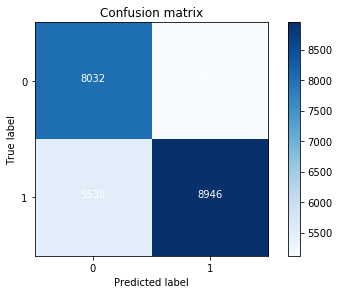

In [59]:
### Confusion Matrix 
from sklearn import metrics

confussionDemo = metrics.confusion_matrix(y_train_pred_finalDM['Performance Tag'], y_train_pred_finalDM.Predicted )

print("Recall metric in the train dataset: {}%".format(100*confussionDemo[1,1]/(confussionDemo[1,0]+confussionDemo[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(confussionDemo , classes=class_names, title='Confusion matrix')
plt.show()

In [60]:
### Print the Accuracy Score 
print(metrics.accuracy_score(y_train_pred_finalDM['Performance Tag'], y_train_pred_finalDM.Predicted))

0.6143436097843392


In [61]:
TP = confussionDemo[1,1] # true positive 
TN = confussionDemo[0,0] # true negatives
FP = confussionDemo[0,1] # false positives
FN = confussionDemo[1,0] # false negatives

In [62]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6176470588235294

In [63]:
# Let us calculate specificity
TN / float(TN+FP)

0.610705596107056

#### The ROC Curve

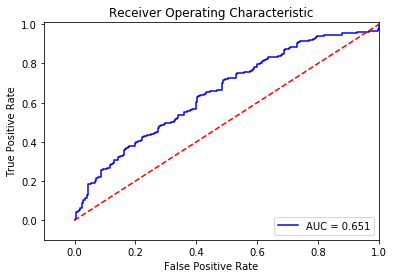

In [64]:
#### Printing the ROC Curve for Train Data
tmp = lr1
y_pred_sample_score = tmp.decision_function(X_test_DM)


fpr, tpr, thresholds = roc_curve(y_test_DM, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [65]:
### Getting the Precision Score
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_finalDM['Performance Tag'], y_train_pred_finalDM.Predicted)

0.636001706242002

In [66]:
### Getting the Recall Score
recall_score(y_train_pred_finalDM['Performance Tag'], y_train_pred_finalDM.Predicted)

0.6176470588235294

Total Accuracy:  0.6095913542722053
Recall metric in the testing dataset: 62.10221793635487%
Precision metric in the testing dataset: 58.73293664683234%


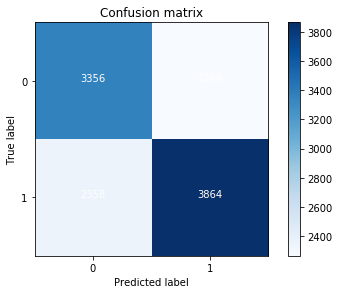

In [67]:
### Making Predcition on the Test Data and Printing the Confusion Matrix
y_pre = lr1.predict(X_test_DM)

cnf_matrix = confusion_matrix(y_test_DM, y_pre)

print("Total Accuracy: ", metrics.accuracy_score(y_test_DM, y_pre))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [68]:
### Printing the Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_DM, y_pre))

              precision    recall  f1-score   support

         0.0       0.59      0.60      0.59      5622
         1.0       0.63      0.62      0.63      6222

    accuracy                           0.61     11844
   macro avg       0.61      0.61      0.61     11844
weighted avg       0.61      0.61      0.61     11844



### So we can see the DemoGraphic Dataset is not very much helpful in Predictions

##### Combining both the Dataframe into a Master DF

In [69]:
### Getting a copy of Both the DF again
CBData = credit_bf_model
demoData = demo_bf_model

In [70]:
### Merging the two DF using Application ID
master_df = pd.merge(CBData, demoData, on='Application ID', how='inner')
print("Size of the new DF is: ",master_df.shape)
master_df.head()

Size of the new DF is:  (69867, 30)


Application ID  No of times 90 DPD or worse in last 6 months  \
0       954457215                                             0   
1       432830445                                             0   
2       941387308                                             0   
3       392161677                                             0   
4       182011211                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0               

In [71]:
### There are two Performance Tags in the Master DF so Dropping one of them.
master_df = master_df.drop('Performance Tag_x', axis=1)

## Renaming the Column Performance Tag_y with Performance Tag
master_df.rename(columns={'Performance Tag_y': 'Performance Tag'}, inplace=True)
master_df.head()

Application ID  No of times 90 DPD or worse in last 6 months  \
0       954457215                                             0   
1       432830445                                             0   
2       941387308                                             0   
3       392161677                                             0   
4       182011211                                             0   

   No of times 60 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 30 DPD or worse in last 6 months  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   No of times 90 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 60 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   No of times 30 DPD or worse in last 12 months  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Avgas CC Utilization in last 12 months  \
0                                     4.0   
1                                     3.0   
2                                     7.0   
3                                    11.0   
4                                    12.0   

   No of trades opened in last 6 months  \
0                                   1.0   
1                                   1.0   
2                                   0.0   
3                                   1.0   
4                                   0.0   

   No of trades opened in last 12 months  \
0                                      2   
1                                      2   
2                                      0   
3                                      1   
4                                      1   

   No of PL trades opened in last 6 months  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   No of PL trades opened in last 12 months  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   No of Inquiries in last 6 months (excluding home & auto loans)  \
0                                                  0                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   No of Inquiries in last 12 months (excluding home & auto loans)  \
0                                                  0                 
1                                                  0                 
2                                                  0               

In [72]:
master_df.shape

(69867, 29)

In [73]:
### Create a new DF with WOE and IV from the Combined DataFrame DataFrame
iv_master, woe_master = iv_woe(data = master_df, target = 'Performance Tag', bins=10, show_woe = True)
iv_master

Information value of Application ID is 0.001487
         Variable                       Cutoff     N  Events  % of Events  \
0  Application ID     (100449.999, 99490857.8]  6987   292.0     0.099050   
1  Application ID    (99490857.8, 199470441.0]  6987   276.0     0.093623   
2  Application ID   (199470441.0, 298569304.0]  6986   305.0     0.103460   
3  Application ID   (298569304.0, 399380461.8]  6987   295.0     0.100068   
4  Application ID   (399380461.8, 498001549.0]  6987   312.0     0.105834   
5  Application ID   (498001549.0, 599104434.0]  6986   281.0     0.095319   
6  Application ID   (599104434.0, 699936232.0]  6987   298.0     0.101085   
7  Application ID   (699936232.0, 798890216.0]  6986   305.0     0.103460   
8  Application ID   (798890216.0, 899541680.4]  6987   285.0     0.096676   
9  Application ID  (899541680.4, 1000084142.0]  6987   299.0     0.101425   

   Non-Events  % of Non-Events       WoE            IV  
0      6695.0         0.100046 -0.010006  9.967

Information value of No of PL trades opened in last 12 months is 0.299188
                                    Variable  Cutoff      N  Events  \
0   No of PL trades opened in last 12 months       0  25824   457.0   
1   No of PL trades opened in last 12 months       1   6640   247.0   
2   No of PL trades opened in last 12 months       2   6830   366.0   
3   No of PL trades opened in last 12 months       3   8131   508.0   
4   No of PL trades opened in last 12 months       4   7903   535.0   
5   No of PL trades opened in last 12 months       5   6189   391.0   
6   No of PL trades opened in last 12 months       6   4023   243.0   
7   No of PL trades opened in last 12 months       7   2223   109.0   
8   No of PL trades opened in last 12 months       8   1172    50.0   
9   No of PL trades opened in last 12 months       9    601    28.0   
10  No of PL trades opened in last 12 months      10    255    10.0   
11  No of PL trades opened in last 12 months      11     66     3.0   
12 

Information value of Total No of Trades is 0.232294
             Variable         Cutoff      N  Events  % of Events  Non-Events  \
0  Total No of Trades  (-0.001, 2.0]  10679   192.0     0.065129     10487.0   
1  Total No of Trades     (2.0, 3.0]   8614   184.0     0.062415      8430.0   
2  Total No of Trades     (3.0, 4.0]   7490   205.0     0.069539      7285.0   
3  Total No of Trades     (4.0, 5.0]   5714   230.0     0.078019      5484.0   
4  Total No of Trades     (5.0, 6.0]   4968   238.0     0.080733      4730.0   
5  Total No of Trades     (6.0, 7.0]   4828   270.0     0.091588      4558.0   
6  Total No of Trades     (7.0, 9.0]   8439   578.0     0.196065      7861.0   
7  Total No of Trades    (9.0, 11.0]   5730   384.0     0.130258      5346.0   
8  Total No of Trades   (11.0, 20.0]   6587   397.0     0.134668      6190.0   
9  Total No of Trades   (20.0, 44.0]   6818   270.0     0.091588      6548.0   

   % of Non-Events       WoE        IV  
0         0.156712 -0.8780

Variable        IV
0                                     Application ID  0.001487
0       No of times 90 DPD or worse in last 6 months  0.162992
0       No of times 60 DPD or worse in last 6 months  0.211549
0       No of times 30 DPD or worse in last 6 months  0.244473
0      No of times 90 DPD or worse in last 12 months  0.216024
0      No of times 60 DPD or worse in last 12 months  0.188546
0      No of times 30 DPD or worse in last 12 months  0.218904
0             Avgas CC Utilization in last 12 months  0.322034
0               No of trades opened in last 6 months  0.191581
0              No of trades opened in last 12 months  0.308075
0            No of PL trades opened in last 6 months  0.224320
0           No of PL trades opened in last 12 months  0.299188
0  No of Inquiries in last 6 months (excluding ho...  0.209399
0  No of Inquiries in last 12 months (excluding h...  0.300798
0                         Presence of open home loan  0.000000
0                                Outstanding Balance  0.246913
0                                 Total No of Trades  0.232294
0                         Presence of open auto loan  0.001662
0                                                Age  0.004169
0                                             Gender  0.000319
0        Marital Status (at the time of application)  0.000093
0                                   No of dependents  0.002657
0                                             Income  0.042842
0                                          Education  0.000767
0                                        Profession   0.002276
0                                  Type of residence  0.000921
0                  No of months in current residence  0.070893
0                    No of months in current company  0.022707

In [74]:
### Printing the IV Score of the Variables
iv_master[['Variable','IV']]

Variable        IV
0                                     Application ID  0.001487
0       No of times 90 DPD or worse in last 6 months  0.162992
0       No of times 60 DPD or worse in last 6 months  0.211549
0       No of times 30 DPD or worse in last 6 months  0.244473
0      No of times 90 DPD or worse in last 12 months  0.216024
0      No of times 60 DPD or worse in last 12 months  0.188546
0      No of times 30 DPD or worse in last 12 months  0.218904
0             Avgas CC Utilization in last 12 months  0.322034
0               No of trades opened in last 6 months  0.191581
0              No of trades opened in last 12 months  0.308075
0            No of PL trades opened in last 6 months  0.224320
0           No of PL trades opened in last 12 months  0.299188
0  No of Inquiries in last 6 months (excluding ho...  0.209399
0  No of Inquiries in last 12 months (excluding h...  0.300798
0                         Presence of open home loan  0.000000
0                                Outstanding Balance  0.246913
0                                 Total No of Trades  0.232294
0                         Presence of open auto loan  0.001662
0                                                Age  0.004169
0                                             Gender  0.000319
0        Marital Status (at the time of application)  0.000093
0                                   No of dependents  0.002657
0                                             Income  0.042842
0                                          Education  0.000767
0                                        Profession   0.002276
0                                  Type of residence  0.000921
0                  No of months in current residence  0.070893
0                    No of months in current company  0.022707

In [75]:
### Getting the Variables name with less than .02 IV Value as they do not affect the decision making significantly
low_IV_Cols = iv_master.loc[iv_master.IV < 0.02]
low_IV_Cols

Variable        IV
0                               Application ID  0.001487
0                   Presence of open home loan  0.000000
0                   Presence of open auto loan  0.001662
0                                          Age  0.004169
0                                       Gender  0.000319
0  Marital Status (at the time of application)  0.000093
0                             No of dependents  0.002657
0                                    Education  0.000767
0                                  Profession   0.002276
0                            Type of residence  0.000921

In [76]:
## Dropping Application ID from the Low IV Score Variable DF
low_IV_Cols = low_IV_Cols[low_IV_Cols.Variable != "Application ID"]
low_IV_Cols

Variable        IV
0                   Presence of open home loan  0.000000
0                   Presence of open auto loan  0.001662
0                                          Age  0.004169
0                                       Gender  0.000319
0  Marital Status (at the time of application)  0.000093
0                             No of dependents  0.002657
0                                    Education  0.000767
0                                  Profession   0.002276
0                            Type of residence  0.000921

In [77]:
master_df = master_df.drop(low_IV_Cols.Variable, axis=1)
master_df

Application ID  No of times 90 DPD or worse in last 6 months  \
0           954457215                                             0   
1           432830445                                             0   
2           941387308                                             0   
3           392161677                                             0   
4           182011211                                             0   
5           312196805                                             0   
6           532217204                                             0   
7            74788849                                             0   
8           782743811                                             0   
9            96964957                                             0   
10          547975524                                             0   
11          521995234                                             0   
12          896612622                                             0   
13          179296033                                             0   
14          951198562                                             0   
15          268129376                                             0   
16          229994022                                             0   
17          833334789                                             0   
18          900107201                                             0   
19          537943379                                             0   
20          576841684                                             0   
21          817454930                                             0   
22          754050473                                             0   
23          939142798                                             0   
24          587187261                                             0   
25           78368564                                             0   
26          372055158                                             0   
27          712127806                                             0   
28          276451706                                             0   
29          474844986                                             0   
30          450207946                                             0   
31          818990114                                             0   
32          815851233                                             0   
33          255158903                                             0   
34          980337675                                             0   
35          877820556                                             0   
36          578573806                                             0   
37          411290180                                             0   
38          126854196                                             0   
39          973545215                                             0   
40          417512737                                             0   
41          824199625                                             0   
42           28904105                                             0   
43          676472750                                             0   
44          663049762                                             0   
45          230209525                                             0   
46           23174187                                             0   
47          690596705                                             0   
48          223109009                                             0   
49           28408728                                             0   
50          510331027                                             0   
51          952237403                                             0   
52          231595248                                             0   
53          418382739                                             0   
54           97277643                                             0   
55          804137508          

In [78]:
### Removing Application ID from the WOE
woe_master = woe_master[woe_master.Variable != 'Application ID'] 
woe_master

Variable                  Cutoff  \
0        No of times 90 DPD or worse in last 6 months                       0   
1        No of times 90 DPD or worse in last 6 months                       1   
2        No of times 90 DPD or worse in last 6 months                       2   
3        No of times 90 DPD or worse in last 6 months                       3   
0        No of times 60 DPD or worse in last 6 months                       0   
1        No of times 60 DPD or worse in last 6 months                       1   
2        No of times 60 DPD or worse in last 6 months                       2   
3        No of times 60 DPD or worse in last 6 months                       3   
4        No of times 60 DPD or worse in last 6 months                       4   
5        No of times 60 DPD or worse in last 6 months                       5   
0        No of times 30 DPD or worse in last 6 months                       0   
1        No of times 30 DPD or worse in last 6 months                       1   
2        No of times 30 DPD or worse in last 6 months                       2   
3        No of times 30 DPD or worse in last 6 months                       3   
4        No of times 30 DPD or worse in last 6 months                       4   
5        No of times 30 DPD or worse in last 6 months                       5   
6        No of times 30 DPD or worse in last 6 months                       6   
7        No of times 30 DPD or worse in last 6 months                       7   
0       No of times 90 DPD or worse in last 12 months                       0   
1       No of times 90 DPD or worse in last 12 months                       1   
2       No of times 90 DPD or worse in last 12 months                       2   
3       No of times 90 DPD or worse in last 12 months                       3   
4       No of times 90 DPD or worse in last 12 months                       4   
5       No of times 90 DPD or worse in last 12 months                       5   
0       No of times 60 DPD or worse in last 12 months                       0   
1       No of times 60 DPD or worse in last 12 months                       1   
2       No of times 60 DPD or worse in last 12 months                       2   
3       No of times 60 DPD or worse in last 12 months                       3   
4       No of times 60 DPD or worse in last 12 months                       4   
5       No of times 60 DPD or worse in last 12 months                       5   
6       No of times 60 DPD or worse in last 12 months                       6   
7       No of times 60 DPD or worse in last 12 months                       7   
0       No of times 30 DPD or worse in last 12 months                       0   
1       No of times 30 DPD or worse in last 12 months                       1   
2       No of times 30 DPD or worse in last 12 months                       2   
3       No of times 30 DPD or worse in last 12 months                       3   
4       No of times 30 DPD or worse in last 12 months                       4   
5       No of times 30 DPD or worse in last 12 months                       5   
6       No of times 30 DPD or worse in last 12 months                       6   
7       No of times 30 DPD or worse in last 12 months                       7   
8       No of times 30 DPD or worse in last 12 months                       8   
9       No of times 30 DPD or worse in last 12 months                       9   
0              Avgas CC Utilization in last 12 months           (-0.001, 5.0]   
1              Avgas CC Utilization in last 12 months              (5.0, 7.0]   
2              Avgas CC Utilization in last 12 months              (7.0, 9.0]   
3              Avgas CC Utilization in last 12 months             (9.0, 12.0]   
4              Avgas CC Utilization in last 12 months            (12.0, 15.0]   
5              Avgas CC Utilization in last 12 months            (15.0, 22.0]   
6              Avgas CC Utilization in last 12 months            (22.0, 38.0

In [79]:
woe_master.groupby('Variable').count()

Cutoff   N  Events  \
Variable                                                                 
Age                                                     10  10      10   
Avgas CC Utilization in last 12 months                  10  10      10   
Education                                                5   5       5   
Gender                                                   2   2       2   
Income                                                  10  10      10   
Marital Status (at the time of application)              2   2       2   
No of Inquiries in last 12 months (excluding ho...      21  21      21   
No of Inquiries in last 6 months (excluding hom...      11  11      11   
No of PL trades opened in last 12 months                13  13      13   
No of PL trades opened in last 6 months                  7   7       7   
No of dependents                                         5   5       5   
No of months in current company                         10  10      10   
No of months in current residence                        6   6       6   
No of times 30 DPD or worse in last 12 months           10  10      10   
No of times 30 DPD or worse in last 6 months             8   8       8   
No of times 60 DPD or worse in last 12 months            8   8       8   
No of times 60 DPD or worse in last 6 months             6   6       6   
No of times 90 DPD or worse in last 12 months            6   6       6   
No of times 90 DPD or worse in last 6 months             4   4       4   
No of trades opened in last 12 months                   29  29      29   
No of trades opened in last 6 months                    13  13      13   
Outstanding Balance                                     10  10      10   
Presence of open auto loan                               2   2       2   
Presence of open home loan                               1   1       1   
Profession                                               3   3       3   
Total No of Trades                                      10  10      10   
Type of residence                                        5   5       5   

                                                    % of Events  Non-Events  \
Variable                                                                      
Age                                                          10          10   
Avgas CC Utilization in last 12 months                       10          10   
Education                                                     5           5   
Gender                                                        2           2   
Income                                                       10          10   
Marital Status (at the time of application)                   2           2   
No of Inquiries in last 12 months (excluding ho...           21          21   
No of Inquiries in last 6 months (excluding hom...           11          11   
No of PL trades opened in last 12 months                     13          13   
No of PL trades opened in last 6 months                       7           7   
No of dependents                                              5           5   
No of months in current company                              10          10   
No of months in current residence                             6           6   
No of times 30 DPD or worse in last 12 months                10          10   
No of times 30 DPD or worse in last 6 months                  8           8   
No of times 60 DPD or worse in last 12 months                 8           8   
No of times 60 DPD or worse in last 6 months                  6           6   
No of times 90 DPD or worse in last 12 months                 6           6   
No of times 90 DPD or worse in last 6 months                  4           4   
No of trades opened in last 12 months                        29          29   
No of trades opened in last 6 months                         13          13   
Outstanding Balance                                          10          10   
Presence 

In [80]:
woe_master.Cutoff[woe_master.Variable == 'No of trades opened in last 6 months'] = woe_master.Cutoff[
    woe_master.Variable == 'No of trades opened in last 6 months'].astype(int)

In [81]:

### Taking Variables one by one and keeping the Column name in a different List
master_df = replace_on_variables('No of times 90 DPD or worse in last 6 months', master_df, woe_master)
Cols_to_remove = ["No of times 90 DPD or worse in last 6 months"]

### Considering the Variable No of times 60 DPD or worse in last 6 months
master_df = replace_on_variables('No of times 60 DPD or worse in last 6 months', master_df, woe_master)
Cols_to_remove.append("No of times 60 DPD or worse in last 6 months")

### Considering the Variable No of times 30 DPD or worse in last 6 months
master_df = replace_on_variables('No of times 30 DPD or worse in last 6 months', master_df, woe_master)
Cols_to_remove.append("No of times 30 DPD or worse in last 6 months")

### Considering the Variable 'No of times 90 DPD or worse in last 12 months'
master_df = replace_on_variables('No of times 90 DPD or worse in last 12 months', master_df, woe_master)
Cols_to_remove.append("No of times 90 DPD or worse in last 12 months")

### Considering Variable "No of times 60 DPD or worse in last 12 months"
master_df = replace_on_variables('No of times 60 DPD or worse in last 12 months', master_df, woe_master)
Cols_to_remove.append("No of times 60 DPD or worse in last 12 months")

### COnsidering Variable 'No of times 30 DPD or worse in last 12 months'
master_df = replace_on_variables('No of times 30 DPD or worse in last 12 months', master_df, woe_master)
Cols_to_remove.append("No of times 30 DPD or worse in last 12 months")

### Considering Variable 'No of Inquiries in last 6 months (excluding home & auto loans)'
master_df = replace_on_variables('No of Inquiries in last 6 months (excluding home & auto loans)', master_df, woe_master)
Cols_to_remove.append("No of Inquiries in last 6 months (excluding home & auto loans)")

### Considering Variable 'No of Inquiries in last 6 months (excluding home & auto loans)'
master_df = replace_on_variables('No of Inquiries in last 12 months (excluding home & auto loans)', 
                                      master_df, woe_master)
Cols_to_remove.append("No of Inquiries in last 12 months (excluding home & auto loans)")

### Considering Variable 'No of PL trades opened in last 12 months'
master_df = replace_on_variables('No of PL trades opened in last 12 months', master_df, woe_master)
Cols_to_remove.append("No of PL trades opened in last 12 months")

### Considering Variable 'No of PL trades opened in last 6 months'
master_df = replace_on_variables('No of PL trades opened in last 6 months', master_df, woe_master)
Cols_to_remove.append("No of PL trades opened in last 6 months")

### Considering Variable 'No of trades opened in last 6 months'
master_df = replace_on_variables('No of trades opened in last 6 months', master_df, woe_master)
Cols_to_remove.append("No of trades opened in last 6 months")

### Considering Variable 'No of trades opened in last 6 months'
master_df = replace_on_variables('No of trades opened in last 12 months', master_df, woe_master)
Cols_to_remove.append("No of trades opened in last 12 months")


master_df

Application ID  No of times 90 DPD or worse in last 6 months  \
0           954457215                                             0   
1           432830445                                             0   
2           941387308                                             0   
3           392161677                                             0   
4           182011211                                             0   
5           312196805                                             0   
6           532217204                                             0   
7            74788849                                             0   
8           782743811                                             0   
9            96964957                                             0   
10          547975524                                             0   
11          521995234                                             0   
12          896612622                                             0   
13          179296033                                             0   
14          951198562                                             0   
15          268129376                                             0   
16          229994022                                             0   
17          833334789                                             0   
18          900107201                                             0   
19          537943379                                             0   
20          576841684                                             0   
21          817454930                                             0   
22          754050473                                             0   
23          939142798                                             0   
24          587187261                                             0   
25           78368564                                             0   
26          372055158                                             0   
27          712127806                                             0   
28          276451706                                             0   
29          474844986                                             0   
30          450207946                                             0   
31          818990114                                             0   
32          815851233                                             0   
33          255158903                                             0   
34          980337675                                             0   
35          877820556                                             0   
36          578573806                                             0   
37          411290180                                             0   
38          126854196                                             0   
39          973545215                                             0   
40          417512737                                             0   
41          824199625                                             0   
42           28904105                                             0   
43          676472750                                             0   
44          663049762                                             0   
45          230209525                                             0   
46           23174187                                             0   
47          690596705                                             0   
48          223109009                                             0   
49           28408728                                             0   
50          510331027                                             0   
51          952237403                                             0   
52          231595248                                             0   
53          418382739                                             0   
54           97277643                                             0   
55          804137508          

In [82]:
### Replacing Variables with Interval
### Considering Variable 'No of trades opened in last 12 months'
#master_df = replace_on_variables_cont('No of trades opened in last 12 months', master_df, woe_master)
#Cols_to_remove.append("No of trades opened in last 12 months")


### Considering Variable 'Avgas CC Utilization in last 12 months'
### First Imputing NA values with 0 so that while using na.maximum it returns some numeric value instead of Na
master_df['Avgas CC Utilization in last 12 months'] = master_df['Avgas CC Utilization in last 12 months'].fillna(0)
master_df = replace_on_variables_cont('Avgas CC Utilization in last 12 months', master_df, woe_master)
Cols_to_remove.append("Avgas CC Utilization in last 12 months")

### Considering Variable 'Outstanding Balance'
master_df = replace_on_variables_cont('Outstanding Balance', master_df, woe_master)
Cols_to_remove.append("Outstanding Balance")

### Considering Variable 'Total No of Trades'
master_df = replace_on_variables_cont('Total No of Trades', master_df, woe_master)
Cols_to_remove.append("Total No of Trades")


#### Considering Variable 'Income'
master_df = replace_on_variables_cont('Income', master_df, woe_master)
Cols_to_remove.append("Income")

### Consider variable 'No of months in current residence'
master_df = replace_on_variables_cont('No of months in current residence', master_df, woe_master)
Cols_to_remove.append("No of months in current residence")


### Considering Variable 'No of months in current company'
master_df = replace_on_variables_cont('No of months in current company', master_df, woe_master)
Cols_to_remove.append("No of months in current company")
master_df

Application ID  No of times 90 DPD or worse in last 6 months  \
0           954457215                                             0   
1           432830445                                             0   
2           941387308                                             0   
3           392161677                                             0   
4           182011211                                             0   
5           312196805                                             0   
6           532217204                                             0   
7            74788849                                             0   
8           782743811                                             0   
9            96964957                                             0   
10          547975524                                             0   
11          521995234                                             0   
12          896612622                                             0   
13          179296033                                             0   
14          951198562                                             0   
15          268129376                                             0   
16          229994022                                             0   
17          833334789                                             0   
18          900107201                                             0   
19          537943379                                             0   
20          576841684                                             0   
21          817454930                                             0   
22          754050473                                             0   
23          939142798                                             0   
24          587187261                                             0   
25           78368564                                             0   
26          372055158                                             0   
27          712127806                                             0   
28          276451706                                             0   
29          474844986                                             0   
30          450207946                                             0   
31          818990114                                             0   
32          815851233                                             0   
33          255158903                                             0   
34          980337675                                             0   
35          877820556                                             0   
36          578573806                                             0   
37          411290180                                             0   
38          126854196                                             0   
39          973545215                                             0   
40          417512737                                             0   
41          824199625                                             0   
42           28904105                                             0   
43          676472750                                             0   
44          663049762                                             0   
45          230209525                                             0   
46           23174187                                             0   
47          690596705                                             0   
48          223109009                                             0   
49           28408728                                             0   
50          510331027                                             0   
51          952237403                                             0   
52          231595248                                             0   
53          418382739                                             0   
54           97277643                                             0   
55          804137508          

In [83]:
Cols_to_remove = list(set(Cols_to_remove))
Cols_to_remove

['Avgas CC Utilization in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 90 DPD or worse in last 6 months',
 'No of PL trades opened in last 12 months',
 'Income',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of months in current company',
 'No of times 30 DPD or worse in last 12 months',
 'No of trades opened in last 12 months',
 'No of times 90 DPD or worse in last 12 months',
 'Total No of Trades',
 'No of PL trades opened in last 6 months',
 'Outstanding Balance',
 'No of times 60 DPD or worse in last 6 months',
 'No of months in current residence',
 'No of trades opened in last 6 months',
 'No of times 30 DPD or worse in last 6 months']

In [84]:
master_df = master_df
master_df = master_df.drop(Cols_to_remove, axis=1)
master_df

Application ID  Performance Tag  \
0           954457215              0.0   
1           432830445              0.0   
2           941387308              0.0   
3           392161677              0.0   
4           182011211              0.0   
5           312196805              0.0   
6           532217204              0.0   
7            74788849              0.0   
8           782743811              0.0   
9            96964957              0.0   
10          547975524              0.0   
11          521995234              0.0   
12          896612622              0.0   
13          179296033              0.0   
14          951198562              0.0   
15          268129376              0.0   
16          229994022              0.0   
17          833334789              0.0   
18          900107201              0.0   
19          537943379              0.0   
20          576841684              0.0   
21          817454930              0.0   
22          754050473              0.0   
23          939142798              0.0   
24          587187261              0.0   
25           78368564              0.0   
26          372055158              0.0   
27          712127806              0.0   
28          276451706              0.0   
29          474844986              0.0   
30          450207946              0.0   
31          818990114              0.0   
32          815851233              0.0   
33          255158903              0.0   
34          980337675              0.0   
35          877820556              0.0   
36          578573806              0.0   
37          411290180              0.0   
38          126854196              0.0   
39          973545215              0.0   
40          417512737              0.0   
41          824199625              0.0   
42           28904105              0.0   
43          676472750              0.0   
44          663049762              0.0   
45          230209525              0.0   
46           23174187              0.0   
47          690596705              0.0   
48          223109009              0.0   
49           28408728              0.0   
50          510331027              0.0   
51          952237403              0.0   
52          231595248              0.0   
53          418382739              0.0   
54           97277643              0.0   
55          804137508              0.0   
56          634559268              0.0   
57          851345810              0.0   
58           59996929              0.0   
59          969062742              0.0   
60          263198025              0.0   
61           72180426              0.0   
62          944793658              0.0   
63          539924921              0.0   
64          229275135              0.0   
65          261333507              0.0   
66          299836432              0.0   
67          559139774              0.0   
68          676809595              0.0   
69          246120697              0.0   
70          942453948              0.0   
71          714943699              0.0   
72          898561748              0.0   
73          913140909              0.0   
74          975085624              0.0   
75          354139458              0.0   
76          335496361              0.0   
77          139842806              0.0   
78          456275546              0.0   
79          377122230              0.0   
80          187398899              0.0   
81          686414499              0.0   
82          447527267              0.0   
83          829997871              0.0   
84          484468249              0.0   
85          270870452              0.0   
86          995659690              0.0   
87          720068644              0.0   
88          665633706              0.0   
89          290948662              0.0   
90           37609385              0.0   
91          950296030              0.0   
92           47509215              0.0   
93          841163519              0.0   
94          55254

In [85]:
## Coping Dataframe to be used Again in Future
mergedDF = master_df

### Model Building

#### Model with Both the Dataset

In [86]:
# Import library to split the dataset into test and train
from sklearn.model_selection import train_test_split

In [87]:
#### Dropping Application ID as it will not be used in Regression Model
mergedDF = mergedDF.drop("Application ID", axis=1)

# Putting feature variable to X
X = mergedDF.drop(['Performance Tag'],axis=1)
xColumns = X.columns ### Taking Backup of Columns, will be used after Smoteenn

# Putting response variable to y
y = mergedDF['Performance Tag']

In [88]:
### Split DataSet

### Using SMOTEEN for treating the Class Imbalance
sm = SMOTEENN(random_state = 101)
X, y = sm.fit_sample(X, y.ravel())

X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X,y, train_size=0.70,test_size=0.30,random_state=100)

In [89]:

X_train_res = pd.DataFrame(X_train_res)
y_train_pd = pd.DataFrame(y_train_res)
X_test_res = pd.DataFrame(X_test_res)
y_test_pd = pd.DataFrame(y_test_res)

In [90]:
### Assigning back the Column Names
X_train_res.columns = xColumns
X_test_res.columns = xColumns

In [91]:
### Printing the shape of Train dataset for taking a peek into transformation after Smoteenn
print("Y Train is: ", y_train_pd[0].shape)
print("X Train is:", X_train_res.shape)
print("Y Test is: ", y_test_pd[0].shape)
print("X Test is:", X_test_res.shape)

Y Train is:  (80814,)
X Train is: (80814, 18)
Y Test is:  (34635,)
X Test is: (34635, 18)


In [92]:
X_train_res

No of times 90 DPD or worse in last 6 months_woe  \
0                                             -0.261032   
1                                             -0.261032   
2                                              0.587564   
3                                              0.587564   
4                                              0.809821   
5                                             -0.261032   
6                                              0.587564   
7                                             -0.261032   
8                                              0.587564   
9                                             -0.261032   
10                                             0.587564   
11                                            -0.261032   
12                                            -0.261032   
13                                            -0.261032   
14                                            -0.261032   
15                                            -0.261032   
16                                             0.587564   
17                                            -0.261032   
18                                             0.587564   
19                                             0.587564   
20                                             0.587564   
21                                            -0.261032   
22                                            -0.261032   
23                                            -0.261032   
24                                            -0.261032   
25                                            -0.261032   
26                                            -0.261032   
27                                             0.587564   
28                                            -0.261032   
29                                            -0.261032   
30                                            -0.261032   
31                                            -0.261032   
32                                             0.587564   
33                                             0.809821   
34                                            -0.261032   
35                                            -0.261032   
36                                            -0.261032   
37                                            -0.261032   
38                                            -0.261032   
39                                             0.587564   
40                                             0.277376   
41                                            -0.261032   
42                                            -0.261032   
43                                             0.634148   
44                                            -0.261032   
45                                            -0.261032   
46                                            -0.261032   
47                                            -0.261032   
48                                            -0.261032   
49                                            -0.261032   
50                                            -0.261032   
51                                             0.587564   
52                                            -0.261032   
53                                            -0.261032   
54                                            -0.261032   
55                                            -0.261032   
56                                            -0.261032   
57                                            -0.261032   
58                                            -0.261032   
59                                            -0.261032   
60                                            -0.261032   
61                                            -0.261032   
62                                            -0.261032   
63                                            -0.261032   
64                                            -0.261032   
65                                            -0.261032   
66                                            -0.26103

In [93]:
### Using GridSearchCV for getting the Optimum Model Parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr']
class_weight_options = ['balanced']

lr = LogisticRegression()

param_grid = dict(solver = solver_options, multi_class = multi_class_options, class_weight = class_weight_options) 

clf = GridSearchCV(lr, param_grid, cv=5, return_train_score = True, scoring = 'accuracy')
clf.fit(X_train_res, y_train_res.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'class_weight': ['balanced'], 'multi_class': ['ovr'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [94]:
# scores of GridSearch CV
scores = clf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.577100      0.062971         0.005127        0.000980   
1       0.305171      0.016797         0.004717        0.000585   
2       0.382726      0.046514         0.004356        0.000089   
3       1.061831      0.053529         0.004660        0.000516   

  param_class_weight param_multi_class param_solver  \
0           balanced               ovr    newton-cg   
1           balanced               ovr        lbfgs   
2           balanced               ovr    liblinear   
3           balanced               ovr          sag   

                                              params  split0_test_score  \
0  {'class_weight': 'balanced', 'multi_class': 'o...           0.687639   
1  {'class_weight': 'balanced', 'multi_class': 'o...           0.687639   
2  {'class_weight': 'balanced', 'multi_class': 'o...           0.687639   
3  {'class_weight': 'balanced', 'multi_class': 'o...           0.687639   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.694611           0.689909           0.682774           0.692984   
1           0.694549           0.689971           0.682774           0.692984   
2           0.694611           0.690033           0.682774           0.692984   
3           0.694611           0.689909           0.682774           0.692984   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.689583        0.004173                2            0.689961   
1         0.689583        0.004160                2            0.689961   
2         0.689608        0.004176                1            0.689961   
3         0.689583        0.004173                2            0.689961   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.688064            0.689456            0.691827   
1            0.688048            0.689471            0.691827   
2            0.688064            0.689456            0.691827   
3            0.688079            0.689456            0.691827   

   split4_train_score  mean_train_score  std_train_score  
0            0.688656          0.689593         0.001293  
1            0.688641          0.689590         0.001299  
2            0.688656          0.689593         0.001293  
3            0.688656          0.689596         0.001290

In [95]:
### Print the Best Estimators 
clf.best_estimator_

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
### Build the Logistic Regression with the Best Estimator
lr1 = clf.best_estimator_
lr1 = lr1.fit(X_train_res, y_train_res.ravel())

In [97]:
### Making the Prediction on Train Dataset
y_train_pred = lr1.predict(X_train_res)

In [98]:
### Making the Final DataFrame to be used for Printing out Model Metrics
y_train_pred_final = pd.DataFrame({'Performance Tag':y_train_pd[0], 'Predicted':y_train_pred})
y_train_pred_final

Performance Tag  Predicted
0                  0.0        1.0
1                  0.0        0.0
2                  1.0        1.0
3                  1.0        1.0
4                  1.0        1.0
5                  0.0        0.0
6                  1.0        1.0
7                  1.0        1.0
8                  1.0        1.0
9                  1.0        1.0
10                 0.0        1.0
11                 1.0        1.0
12                 1.0        1.0
13                 1.0        0.0
14                 1.0        0.0
15                 1.0        1.0
16                 1.0        1.0
17                 1.0        0.0
18                 1.0        1.0
19                 0.0        1.0
20                 1.0        1.0
21                 1.0        0.0
22                 1.0        1.0
23                 0.0        0.0
24                 0.0        0.0
25                 0.0        1.0
26                 1.0        0.0
27                 0.0        1.0
28                 0.0        0.0
29                 0.0        0.0
30                 0.0        1.0
31                 1.0        0.0
32                 1.0        1.0
33                 0.0        1.0
34                 0.0        0.0
35                 1.0        1.0
36                 0.0        0.0
37                 1.0        1.0
38                 0.0        1.0
39                 1.0        1.0
40                 1.0        1.0
41                 1.0        0.0
42                 1.0        0.0
43                 1.0        1.0
44                 0.0        0.0
45                 0.0        1.0
46                 1.0        1.0
47                 1.0        0.0
48                 1.0        1.0
49                 0.0        1.0
50                 0.0        0.0
51                 1.0        1.0
52                 0.0        1.0
53                 0.0        0.0
54                 1.0        0.0
55                 0.0        0.0
56                 1.0        0.0
57                 1.0        0.0
58                 0.0        0.0
59                 0.0        0.0
60                 0.0        0.0
61                 0.0        0.0
62                 1.0        1.0
63                 1.0        0.0
64                 1.0        1.0
65                 0.0        0.0
66                 0.0        0.0
67                 0.0        1.0
68                 0.0        1.0
69                 0.0        1.0
70                 1.0        0.0
71                 1.0        1.0
72                 1.0        1.0
73                 1.0        1.0
74                 0.0        0.0
75                 1.0        1.0
76                 0.0        1.0
77                 1.0        0.0
78                 1.0        0.0
79                 0.0        1.0
80                 1.0        1.0
81                 0.0        0.0
82                 1.0        1.0
83                 0.0        0.0
84                 1.0        1.0
85                 0.0        1.0
86                 1.0        1.0
87                 0.0        0.0
88                 1.0        1.0
89                 1.0        1.0
90                 1.0        1.0
91                 0.0        1.0
92                 1.0        1.0
93                 1.0        0.0
94                 1.0        1.0
95                 0.0        1.0
96                 0.0        1.0
97                 1.0        0.0
98                 1.0        0.0
99                 0.0        1.0
100                0.0        0.0
101                0.0        0.0
102                1.0        0.0
103                0.0        1.0
104                0.0        0.0
105                0.0        1.0
106                0.0        0.0
107                0.0        0.0
108                0.0        0.0
109                1.0        0.0
110                1.0        0.0
111                1.0        1.0
112                1.0        1.0
113                0.0        1.0
114                1.0        0.0
115                0.0        1.0
116                1.0       

#### Confusion Matrix 

Recall metric in the train dataset: 72.76859865372847%


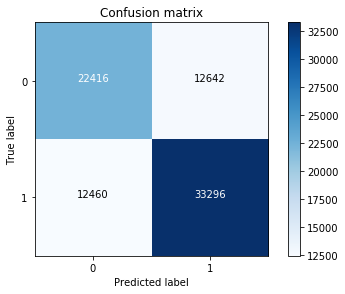

In [99]:
### Confusion Matrix 
from sklearn import metrics

confussion = metrics.confusion_matrix(y_train_pred_final['Performance Tag'], y_train_pred_final.Predicted )

print("Recall metric in the train dataset: {}%".format(100*confussion[1,1]/(confussion[1,0]+confussion[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(confussion , classes=class_names, title='Confusion matrix')
plt.show()

In [100]:
### Print the Accuracy Score 
print(metrics.accuracy_score(y_train_pred_final['Performance Tag'], y_train_pred_final.Predicted))

0.689385502511941


In [101]:
TP = confussion[1,1] # true positive 
TN = confussion[0,0] # true negatives
FP = confussion[0,1] # false positives
FN = confussion[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7276859865372848

In [103]:
# Let us calculate specificity
TN / float(TN+FP)

0.6393975697415711

In [104]:
### Getting the Precision Score
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final['Performance Tag'], y_train_pred_final.Predicted)

0.7248029953415474

In [105]:
### Getting the Recall Score
recall_score(y_train_pred_final['Performance Tag'], y_train_pred_final.Predicted)

0.7276859865372848

Total Accuracy:  0.688118954814494
Recall metric in the testing dataset: 72.73238572451172%
Precision metric in the testing dataset: 64.30627133391339%


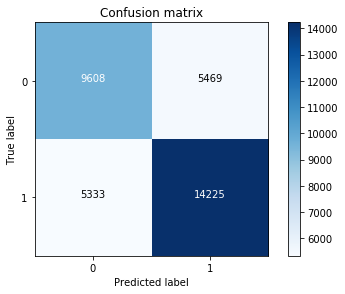

In [106]:
### Making Predcition on the Test Data and Printing the Confusion Matrix
y_pre = lr1.predict(X_test_res)

cnf_matrix = confusion_matrix(y_test_pd[0], y_pre)

print("Total Accuracy: ", metrics.accuracy_score(y_test_pd[0], y_pre))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

#### The ROC Curve

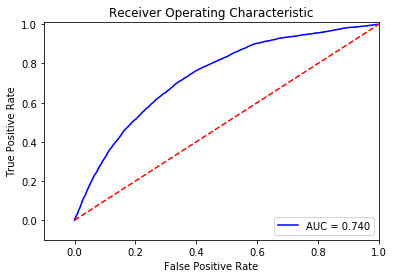

In [107]:
#### Printing the ROC Curve for Train Data
tmp = lr1
y_pred_sample_score = tmp.decision_function(X_test_res)


fpr, tpr, thresholds = roc_curve(y_test_pd[0], y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [108]:
### Printing the Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_pd[0], y_pre))

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64     15077
         1.0       0.72      0.73      0.72     19558

    accuracy                           0.69     34635
   macro avg       0.68      0.68      0.68     34635
weighted avg       0.69      0.69      0.69     34635



/usr/local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


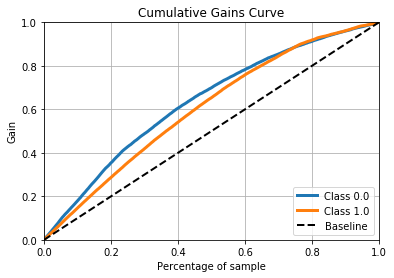

In [111]:
### Take the Predict Probabilities and plot a Gain Chart
import scikitplot as skplt
y_probas = lr1.predict_proba(X_test_res)
skplt.metrics.plot_cumulative_gain(y_test_pd[0], y_probas)
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


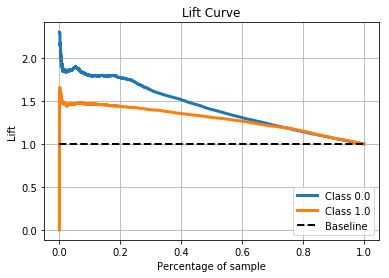

In [112]:
### Plotting the Lift Chart
skplt.metrics.plot_lift_curve(y_test_pd[0], y_probas)
plt.show()

### Using the Same Data for the Decision Tree and Random Forrest models

In [82]:
X_train_res.head()

No of times 90 DPD or worse in last 6 months_woe  \
0                                         -0.261032   
1                                         -0.261032   
2                                          0.587564   
3                                          0.587564   
4                                          0.809821   

   No of times 60 DPD or worse in last 6 months_woe  \
0                                         -0.336701   
1                                         -0.336701   
2                                          0.668121   
3                                          0.933424   
4                                          0.908754   

   No of times 30 DPD or worse in last 6 months_woe  \
0                                          0.465571   
1                                         -0.387125   
2                                          0.766520   
3                                          0.951435   
4                                          0.986505   

   No of times 90 DPD or worse in last 12 months_woe  \
0                                          -0.356987   
1                                          -0.356987   
2                                           0.671598   
3                                           0.671598   
4                                           0.750959   

   No of times 60 DPD or worse in last 12 months_woe  \
0                                           0.213800   
1                                          -0.352253   
2                                           0.710282   
3                                           0.787277   
4                                           0.884177   

   No of times 30 DPD or worse in last 12 months_woe  \
0                                           0.070689   
1                                          -0.376727   
2                                           0.913825   
3                                           0.972425   
4                                           0.959224   

   No of Inquiries in last 6 months (excluding home & auto loans)_woe  \
0                                           0.215743                    
1                                           0.215743                    
2                                           0.215743                    
3                                           0.428282                    
4                                           0.554584                    

   No of Inquiries in last 12 months (excluding home & auto loans)_woe  \
0                                           0.247751                     
1                                           0.247751                     
2                                           0.588045                     
3                                           0.494361                     
4                                           0.538790                     

   No of PL trades opened in last 12 months_woe  \
0                                      0.425795   
1                                      0.250986   
2                                      0.408770   
3                                      0.425795   
4                                      0.467840   

   No of PL trades opened in last 6 months_woe  \
0                                     0.438081   
1                                     0.200454   
2                                     0.438081   
3                                     0.431622   
4                                     0.349793   

   No of trades opened in last 6 months_woe  \
0                                  0.434641   
1                                  0.434641   
2                                  0.434641   
3                                  0.440238   
4                                  0.360149   

   No of trades opened in last 12 months_woe  \
0                                   0.683865   
1                                   0.430922   
2                                   0.634775   
3                               

### Decision tree analysis

In [119]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_res, y_train_pd[0])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [120]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions
y_pred_default = dt_default.predict(X_test_res)

# Printing classification report
print(classification_report(y_test_pd[0], y_pred_default))

              precision    recall  f1-score   support

         0.0       0.79      0.59      0.67     15092
         1.0       0.73      0.88      0.80     19551

    accuracy                           0.75     34643
   macro avg       0.76      0.73      0.74     34643
weighted avg       0.76      0.75      0.75     34643



In [121]:
# Printing confusion matrix
print(confusion_matrix(y_test_pd[0],y_pred_default))


[[ 8848  6244]
 [ 2334 17217]]


In [122]:
# Create the parameter grid based on the Default Model
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, return_train_score = True, 
                           cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_pd[0])

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   42.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [123]:
### Print the Best Params for Model
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [124]:
# scores of GridSearch CV
scoresDT = grid_search.cv_results_
pd.DataFrame(scoresDT).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.488242      0.029588         0.006498        0.001767   
1       0.469166      0.027206         0.005532        0.000318   
2       0.472223      0.015292         0.006790        0.001610   
3       0.443985      0.016319         0.005717        0.000925   
4       0.664579      0.035355         0.006829        0.002068   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                     50   
1         entropy               5                     50   
2         entropy               5                    100   
3         entropy               5                    100   
4         entropy              10                     50   

  param_min_samples_split                                             params  \
0                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                     100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                      50  {'criterion': 'entropy', 'max_depth': 10, 'min...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.743923           0.753309           0.762836           0.759372   
1           0.743923           0.753309           0.762836           0.759372   
2           0.743923           0.753309           0.762836           0.758134   
3           0.743923           0.753309           0.762836           0.758134   
4           0.844684           0.840406           0.827849           0.847829   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.758691         0.755626        0.006599                9   
1           0.758691         0.755626        0.006599                9   
2           0.757516         0.755143        0.006372               11   
3           0.757516         0.755143        0.006372               11   
4           0.848447         0.841843        0.007555                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.749521            0.749138            0.760442   
1            0.749521            0.749138            0.760442   
2            0.749521            0.749138            0.760442   
3            0.749521            0.749138            0.760442   
4            0.853783            0.841444            0.832970   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.763118            0.763303          0.757104         0.006430  
1            0.763118            0.763303          0.757104         0.006430  
2            0.762298            0.762468          0.756773         0.006121  
3            0.762298            0.762468          0.756773         0.006121  
4            0.852842            0.855099          0.847228         0.008639

In [125]:
### Build the Model based on the best Estimator and fit the Train dataset
dTree = grid_search.best_estimator_

dTree = dTree.fit(X_train_res, y_train_res.ravel())

In [126]:
### Predict train Dataset
y_traindTree_pred = dTree.predict(X_train_res)

In [127]:
### Making the Final DataFrame to be used for Printing out Model Metrics with Train dataset
y_train_dTreepred_final = pd.DataFrame({'Performance Tag':y_train_pd[0], 'Predicted':y_traindTree_pred})
y_train_dTreepred_final

Performance Tag  Predicted
0                  0.0        0.0
1                  0.0        0.0
2                  0.0        0.0
3                  0.0        0.0
4                  1.0        1.0
5                  1.0        1.0
6                  0.0        0.0
7                  1.0        1.0
8                  0.0        0.0
9                  1.0        1.0
10                 0.0        1.0
11                 1.0        1.0
12                 0.0        0.0
13                 1.0        1.0
14                 1.0        1.0
15                 1.0        1.0
16                 0.0        0.0
17                 1.0        1.0
18                 1.0        1.0
19                 1.0        1.0
20                 1.0        0.0
21                 1.0        1.0
22                 1.0        1.0
23                 1.0        0.0
24                 1.0        1.0
25                 1.0        1.0
26                 1.0        0.0
27                 1.0        1.0
28                 1.0        1.0
29                 1.0        1.0
30                 1.0        1.0
31                 1.0        1.0
32                 1.0        0.0
33                 1.0        1.0
34                 0.0        0.0
35                 0.0        1.0
36                 1.0        1.0
37                 1.0        1.0
38                 1.0        1.0
39                 0.0        0.0
40                 0.0        0.0
41                 0.0        0.0
42                 1.0        1.0
43                 1.0        1.0
44                 1.0        1.0
45                 0.0        0.0
46                 1.0        0.0
47                 0.0        1.0
48                 1.0        1.0
49                 0.0        0.0
50                 1.0        1.0
51                 1.0        1.0
52                 1.0        1.0
53                 1.0        1.0
54                 1.0        0.0
55                 0.0        0.0
56                 0.0        0.0
57                 1.0        1.0
58                 1.0        1.0
59                 1.0        1.0
60                 0.0        1.0
61                 0.0        1.0
62                 1.0        0.0
63                 0.0        0.0
64                 0.0        0.0
65                 1.0        1.0
66                 0.0        0.0
67                 1.0        1.0
68                 1.0        1.0
69                 0.0        0.0
70                 0.0        0.0
71                 0.0        0.0
72                 0.0        1.0
73                 0.0        0.0
74                 1.0        1.0
75                 0.0        0.0
76                 0.0        0.0
77                 0.0        0.0
78                 0.0        0.0
79                 0.0        0.0
80                 0.0        0.0
81                 1.0        1.0
82                 1.0        1.0
83                 0.0        0.0
84                 1.0        1.0
85                 0.0        0.0
86                 0.0        0.0
87                 0.0        1.0
88                 1.0        1.0
89                 1.0        0.0
90                 0.0        0.0
91                 1.0        1.0
92                 0.0        0.0
93                 1.0        1.0
94                 0.0        0.0
95                 0.0        0.0
96                 1.0        1.0
97                 1.0        1.0
98                 0.0        0.0
99                 1.0        0.0
100                1.0        1.0
101                1.0        0.0
102                0.0        0.0
103                0.0        0.0
104                0.0        1.0
105                1.0        0.0
106                1.0        1.0
107                0.0        0.0
108                1.0        1.0
109                1.0        1.0
110                0.0        0.0
111                0.0        0.0
112                0.0        1.0
113                1.0        0.0
114                1.0        1.0
115                0.0        0.0
116                1.0       

Recall metric in the train dataset: 81.13244815099308%


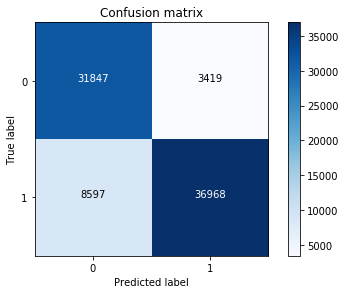

In [128]:
### Printing out the Confusion Matrix
confussionDT = metrics.confusion_matrix(y_train_dTreepred_final['Performance Tag'], y_train_dTreepred_final.Predicted)

print("Recall metric in the train dataset: {}%".format(100*confussionDT[1,1]/(confussionDT[1,0]+confussionDT[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(confussionDT , classes=class_names, title='Confusion matrix')
plt.show()

In [129]:
TPDT = confussionDT[1,1] # true positive 
TNDT = confussionDT[0,0] # true negatives
FPDT = confussionDT[0,1] # false positives
FNDT = confussionDT[1,0] # false negatives

In [130]:
# Print the sensitivity of our DT model
TPDT / float(TPDT+FNDT)

0.8113244815099309

In [131]:
# Let us calculate specificity for DT Model
TNDT / float(TNDT+FPDT)

0.9030510973742415

In [132]:
### Print the Accuracy Score 
print(metrics.accuracy_score(y_train_dTreepred_final['Performance Tag'], y_train_dTreepred_final.Predicted))

0.8513441625119076


In [133]:
### Print the Recall Score for DT Model
print(metrics.recall_score(y_train_dTreepred_final['Performance Tag'], y_train_dTreepred_final.Predicted))

0.8113244815099309


In [134]:
### Print the Precision Score for DT Model
print(metrics.precision_score(y_train_dTreepred_final['Performance Tag'], y_train_dTreepred_final.Predicted))

0.9153440463515488


Total Accuracy:  0.8481367087146032
Recall metric in the testing dataset: 80.88077336197637%
Precision metric in the testing dataset: 78.40180273877621%


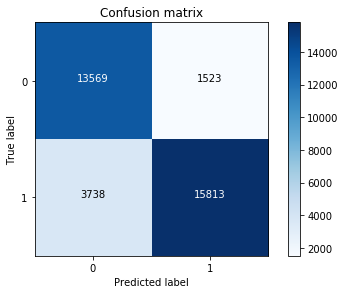

In [135]:
### Making Predcition with Decision Trees on the Test Data and Printing the Confusion Matrix
y_preDT = dTree.predict(X_test_res)

cnf_matrixDT = confusion_matrix(y_test_pd[0], y_preDT)

print("Total Accuracy: ", metrics.accuracy_score(y_test_pd[0], y_preDT))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrixDT[1,1]/(cnf_matrixDT[1,0]+cnf_matrixDT[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrixDT[0,0]/(cnf_matrixDT[0,0]+cnf_matrixDT[1,0])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrixDT , classes=class_names, title='Confusion matrix')
plt.show()

In [136]:
### Printing the Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_pd[0], y_preDT))

              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84     15092
         1.0       0.91      0.81      0.86     19551

    accuracy                           0.85     34643
   macro avg       0.85      0.85      0.85     34643
weighted avg       0.86      0.85      0.85     34643



### Random Forest Analysis

In [319]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [320]:
# fit model
rfc = rfc.fit(X_train_res, y_train_pd[0])

In [321]:
# Making predictions
predictionsRF = rfc.predict(X_test_res)

In [322]:
# Let's check the report of our default model
print(classification_report(y_test_pd[0],predictionsRF))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     15077
         1.0       0.99      0.96      0.98     19558

    accuracy                           0.97     34635
   macro avg       0.97      0.98      0.97     34635
weighted avg       0.97      0.97      0.97     34635



Total Accuracy:  0.9736682546556951
Recall metric in the testing dataset: 95.84824624194702%
Precision metric in the testing dataset: 94.8571790487048%


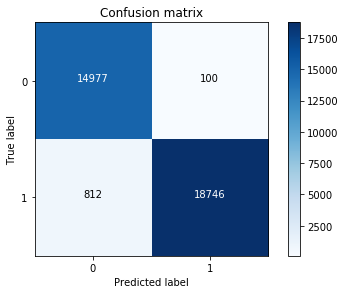

In [326]:
### Making Predcition with Decision Trees on the Test Data and Printing the Confusion Matrix
y_preRF = predictionsRF

cnf_matrixRF = confusion_matrix(y_test_pd[0], y_preRF)

print("Total Accuracy: ", metrics.accuracy_score(y_test_pd[0], y_preRF))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrixRF[1,1]/(cnf_matrixRF[1,0]+cnf_matrixRF[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrixRF[0,0]/(cnf_matrixRF[0,0]+cnf_matrixRF[1,0])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrixRF , classes=class_names, title='Confusion matrix')
plt.show()

In [327]:
### Print the Accuracy Score 
print(metrics.accuracy_score(y_test_pd[0],predictionsRF))

0.9736682546556951


In [328]:
### Using GridSearchCV for finding Optimal Parameters
### specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5),
             'min_samples_leaf': range(50, 150, 50),
             'min_samples_split': range(50, 150, 50),
             'criterion': ["entropy", "gini"]}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(estimator = rf, param_grid = parameters, 
                    cv=n_folds, return_train_score=True,
                   n_jobs = -1,verbose = 1)
rf = rf.fit(X_train_res, y_train_pd[0])

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.7min finished


In [329]:
### printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rf.best_score_,'using',rf.best_params_)

We can get accuracy of 0.9185784641275027 using {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [330]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=17, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [331]:
### scores of GridSearch CV
scoresRF = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.550465      0.064346         0.004645        0.000635   
1       0.337603      0.052090         0.004916        0.000898   
2       0.436458      0.053983         0.005633        0.000982   
3       1.226687      0.076116         0.004554        0.000309   

  param_class_weight param_multi_class param_solver  \
0           balanced               ovr    newton-cg   
1           balanced               ovr        lbfgs   
2           balanced               ovr    liblinear   
3           balanced               ovr          sag   

                                              params  split0_test_score  \
0  {'class_weight': 'balanced', 'multi_class': 'o...           0.687639   
1  {'class_weight': 'balanced', 'multi_class': 'o...           0.687639   
2  {'class_weight': 'balanced', 'multi_class': 'o...           0.687639   
3  {'class_weight': 'balanced', 'multi_class': 'o...           0.687639   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.694611           0.689909           0.682774           0.692984   
1           0.694549           0.689971           0.682774           0.692984   
2           0.694611           0.690033           0.682774           0.692984   
3           0.694549           0.689909           0.682774           0.692984   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.689583        0.004173                2            0.689961   
1         0.689583        0.004160                2            0.689961   
2         0.689608        0.004176                1            0.689961   
3         0.689571        0.004159                4            0.689961   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.688064            0.689456            0.691827   
1            0.688048            0.689471            0.691827   
2            0.688064            0.689456            0.691827   
3            0.688064            0.689471            0.691842   

   split4_train_score  mean_train_score  std_train_score  
0            0.688656          0.689593         0.001293  
1            0.688641          0.689590         0.001299  
2            0.688656          0.689593         0.001293  
3            0.688641          0.689596         0.001301

In [332]:
rf = rf.best_estimator_

In [333]:
# fit
rf.fit(X_train_res,y_train_pd[0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=17, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [334]:
### Make Predictions using built RF Model
predictionsRF = rf.predict(X_test_res)

Total Accuracy:  0.9255377508300852
Recall metric in the testing dataset: 92.13109724920749%
Precision metric in the testing dataset: 90.11941448382126%


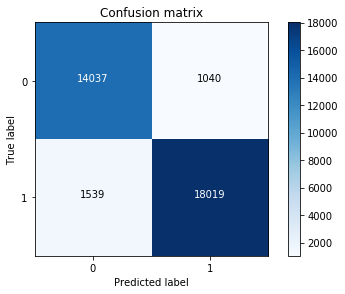

In [336]:
### Making Predcition with Decision Trees on the Test Data and Printing the Confusion Matrix
y_preRF = predictionsRF

cnf_matrixRF = confusion_matrix(y_test_pd[0], y_preRF)

print("Total Accuracy: ", metrics.accuracy_score(y_test_pd[0], y_preRF))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrixRF[1,1]/(cnf_matrixRF[1,0]+cnf_matrixRF[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrixRF[0,0]/(cnf_matrixRF[0,0]+cnf_matrixRF[1,0])))

### Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrixRF , classes=class_names, title='Confusion matrix')
plt.show()

In [337]:

print(classification_report(y_test_pd[0],predictionsRF))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92     15077
         1.0       0.95      0.92      0.93     19558

    accuracy                           0.93     34635
   macro avg       0.92      0.93      0.92     34635
weighted avg       0.93      0.93      0.93     34635



### Building the ScoreCard

In [138]:
### Using the DF created earlier before building Model
mergedDF.head()

Performance Tag  No of times 90 DPD or worse in last 6 months_woe  \
0              0.0                                         -0.261032   
1              0.0                                         -0.261032   
2              0.0                                         -0.261032   
3              0.0                                         -0.261032   
4              0.0                                         -0.261032   

   No of times 60 DPD or worse in last 6 months_woe  \
0                                         -0.336701   
1                                         -0.336701   
2                                         -0.336701   
3                                         -0.336701   
4                                         -0.336701   

   No of times 30 DPD or worse in last 6 months_woe  \
0                                         -0.387125   
1                                         -0.387125   
2                                         -0.387125   
3                                         -0.387125   
4                                         -0.387125   

   No of times 90 DPD or worse in last 12 months_woe  \
0                                          -0.356987   
1                                          -0.356987   
2                                          -0.356987   
3                                          -0.356987   
4                                          -0.356987   

   No of times 60 DPD or worse in last 12 months_woe  \
0                                          -0.352253   
1                                          -0.352253   
2                                          -0.352253   
3                                          -0.352253   
4                                          -0.352253   

   No of times 30 DPD or worse in last 12 months_woe  \
0                                          -0.376727   
1                                          -0.376727   
2                                          -0.376727   
3                                          -0.376727   
4                                          -0.376727   

   No of Inquiries in last 6 months (excluding home & auto loans)_woe  \
0                                          -0.718544                    
1                                          -0.718544                    
2                                          -0.718544                    
3                                          -0.718544                    
4                                          -0.718544                    

   No of Inquiries in last 12 months (excluding home & auto loans)_woe  \
0                                          -1.067842                     
1                                          -1.067842                     
2                                          -1.067842                     
3                                          -1.067842                     
4                                          -1.067842                     

   No of PL trades opened in last 12 months_woe  \
0                                     -0.894165   
1                                     -0.894165   
2                                     -0.894165   
3                                     -0.894165   
4                                     -0.894165   

   No of PL trades opened in last 6 months_woe  \
0                                    -0.649533   
1                                    -0.649533   
2                                    -0.649533   
3                                    -0.649533   
4                                    -0.649533   

   No of trades opened in last 6 months_woe  \
0                                 -0.479885   
1                                 -0.479885   
2                                 -0.657914   
3                                 -0.479885   
4                                 -0.657914   

   No of trades opened in last 12 months_woe  \
0                                  -0.816714   
1                         

In [139]:
#### Taking a copy of DF
merged = mergedDF

In [153]:
#### Taking y in another DF
y = merged['Performance Tag']

In [154]:
### Printing the Coefficient and Intercept for our Logistic Regression
print("Coefficient of the Logistic Rigression: ", lr1.coef_)
print("Intercept of the Logistic Rigression: ", lr1.intercept_)

Coefficient of the Logistic Rigression:  [[ 0.01945075  0.00550321  0.33216177  0.09726106 -0.12185731  0.30854073
   0.02676513  0.54302515 -0.10762455  0.11511531 -0.08254878  0.48869506
   0.44981988  0.25930998 -0.35269984  0.22317038 -0.12271693  0.65698823]]
Intercept of the Logistic Rigression:  [0.0982412]


In [155]:
### Calculating the Coefficient of each Variable used in Logistic Regression
coeficients = pd.DataFrame({"Parameter":xColumns, "Estimates":np.transpose(lr1.coef_[0])})
coeficients

Parameter  Estimates
0    No of times 90 DPD or worse in last 6 months_woe   0.019451
1    No of times 60 DPD or worse in last 6 months_woe   0.005503
2    No of times 30 DPD or worse in last 6 months_woe   0.332162
3   No of times 90 DPD or worse in last 12 months_woe   0.097261
4   No of times 60 DPD or worse in last 12 months_woe  -0.121857
5   No of times 30 DPD or worse in last 12 months_woe   0.308541
6   No of Inquiries in last 6 months (excluding ho...   0.026765
7   No of Inquiries in last 12 months (excluding h...   0.543025
8        No of PL trades opened in last 12 months_woe  -0.107625
9         No of PL trades opened in last 6 months_woe   0.115115
10           No of trades opened in last 6 months_woe  -0.082549
11          No of trades opened in last 12 months_woe   0.488695
12         Avgas CC Utilization in last 12 months_woe   0.449820
13                            Outstanding Balance_woe   0.259310
14                             Total No of Trades_woe  -0.352700
15                                         Income_woe   0.223170
16              No of months in current residence_woe  -0.122717
17                No of months in current company_woe   0.656988

In [156]:
lr_woe_params = coeficients
intercept = lr1.intercept_

In [157]:
### Getting the Variable List used in Logistic Regression
selectedParams = lr_woe_params['Parameter']

In [158]:
### Printing out Shapes of DF
print(merged.shape)
print(lr_woe_params.shape)

(69867, 19)
(18, 2)


In [159]:
### Resetting the Index
lr_woe_params = lr_woe_params.set_index("Parameter")
lr_woe_params

Estimates
Parameter                                                    
No of times 90 DPD or worse in last 6 months_woe     0.019451
No of times 60 DPD or worse in last 6 months_woe     0.005503
No of times 30 DPD or worse in last 6 months_woe     0.332162
No of times 90 DPD or worse in last 12 months_woe    0.097261
No of times 60 DPD or worse in last 12 months_woe   -0.121857
No of times 30 DPD or worse in last 12 months_woe    0.308541
No of Inquiries in last 6 months (excluding hom...   0.026765
No of Inquiries in last 12 months (excluding ho...   0.543025
No of PL trades opened in last 12 months_woe        -0.107625
No of PL trades opened in last 6 months_woe          0.115115
No of trades opened in last 6 months_woe            -0.082549
No of trades opened in last 12 months_woe            0.488695
Avgas CC Utilization in last 12 months_woe           0.449820
Outstanding Balance_woe                              0.259310
Total No of Trades_woe                              -0.352700
Income_woe                                           0.223170
No of months in current residence_woe               -0.122717
No of months in current company_woe                  0.656988

In [160]:
### Calculating the Score
scorecard = merged[lr_woe_params.index].apply(lambda x:x*lr_woe_params['Estimates'].T, axis=1)

In [161]:
scorecard["logit"] = scorecard[list(scorecard.columns)].sum(axis=1) + intercept
scorecard['logit']

0       -1.875629
1       -1.894657
2       -1.480291
3       -1.629817
4       -1.677202
5       -1.372003
6       -1.812062
7       -1.491135
8       -1.271346
9       -1.459637
10      -1.415302
11      -1.573183
12      -1.403871
13      -1.482556
14      -0.940502
15      -1.485089
16      -1.775186
17      -1.579056
18      -1.647898
19      -1.518438
20      -1.096488
21      -1.781313
22      -1.539438
23      -1.556665
24      -1.524654
25      -1.558090
26      -1.350674
27      -1.093849
28      -1.449437
29      -1.553598
30      -1.302529
31      -1.434625
32      -1.551638
33      -1.535140
34      -1.767260
35      -1.524742
36      -1.462708
37      -1.039801
38      -0.926613
39      -1.536910
40      -1.795408
41      -1.259588
42      -1.518228
43      -1.083913
44      -1.437534
45      -1.490664
46      -1.427051
47      -1.239729
48      -1.385062
49      -1.164072
50      -1.695448
51      -1.612850
52      -1.410278
53      -1.519521
54      -1.426282
55      -1

In [162]:
### Converting Log Ratio and creating probabilities
scorecard['odds'] = np.exp(scorecard['logit'])
scorecard['probs'] = scorecard['odds'] / (scorecard['odds'] + 1)

In [163]:
### Getting the Variables
target = 400
odds = 10
doubleOdds = 20

In [164]:
### Factor and Offset Calculation
factor = doubleOdds / np.log(2)
offset = target - factor * np.log(odds)

In [165]:
### Final Score Calculation
scorecard['score'] = offset + factor * scorecard['logit']

In [166]:
### Getting the Actual Response in Scorecard DF
scorecard['Performance Tag'] = y

In [167]:
### Rounding off the Scores by 2 places of Decimel
scorecard['score'] = round(scorecard['score'], 2)
scorecard

No of times 90 DPD or worse in last 6 months_woe  \
0                                             -0.005077   
1                                             -0.005077   
2                                             -0.005077   
3                                             -0.005077   
4                                             -0.005077   
5                                             -0.005077   
6                                             -0.005077   
7                                             -0.005077   
8                                             -0.005077   
9                                             -0.005077   
10                                            -0.005077   
11                                            -0.005077   
12                                            -0.005077   
13                                            -0.005077   
14                                            -0.005077   
15                                            -0.005077   
16                                            -0.005077   
17                                            -0.005077   
18                                            -0.005077   
19                                            -0.005077   
20                                            -0.005077   
21                                            -0.005077   
22                                            -0.005077   
23                                            -0.005077   
24                                            -0.005077   
25                                            -0.005077   
26                                            -0.005077   
27                                            -0.005077   
28                                            -0.005077   
29                                            -0.005077   
30                                            -0.005077   
31                                            -0.005077   
32                                            -0.005077   
33                                            -0.005077   
34                                            -0.005077   
35                                            -0.005077   
36                                            -0.005077   
37                                            -0.005077   
38                                            -0.005077   
39                                            -0.005077   
40                                            -0.005077   
41                                            -0.005077   
42                                            -0.005077   
43                                            -0.005077   
44                                            -0.005077   
45                                            -0.005077   
46                                            -0.005077   
47                                            -0.005077   
48                                            -0.005077   
49                                            -0.005077   
50                                            -0.005077   
51                                            -0.005077   
52                                            -0.005077   
53                                            -0.005077   
54                                            -0.005077   
55                                            -0.005077   
56                                            -0.005077   
57                                            -0.005077   
58                                            -0.005077   
59                                            -0.005077   
60                                            -0.005077   
61                                            -0.005077   
62                                            -0.005077   
63                                            -0.005077   
64                                            -0.005077   
65                                            -0.005077   
66                                            -0.00507

In [168]:
### Removing Outliers i.e. high score values
finalScorecard = scorecard[scorecard['score'] <= 400]
finalScorecard

No of times 90 DPD or worse in last 6 months_woe  \
0                                             -0.005077   
1                                             -0.005077   
2                                             -0.005077   
3                                             -0.005077   
4                                             -0.005077   
5                                             -0.005077   
6                                             -0.005077   
7                                             -0.005077   
8                                             -0.005077   
9                                             -0.005077   
10                                            -0.005077   
11                                            -0.005077   
12                                            -0.005077   
13                                            -0.005077   
14                                            -0.005077   
15                                            -0.005077   
16                                            -0.005077   
17                                            -0.005077   
18                                            -0.005077   
19                                            -0.005077   
20                                            -0.005077   
21                                            -0.005077   
22                                            -0.005077   
23                                            -0.005077   
24                                            -0.005077   
25                                            -0.005077   
26                                            -0.005077   
27                                            -0.005077   
28                                            -0.005077   
29                                            -0.005077   
30                                            -0.005077   
31                                            -0.005077   
32                                            -0.005077   
33                                            -0.005077   
34                                            -0.005077   
35                                            -0.005077   
36                                            -0.005077   
37                                            -0.005077   
38                                            -0.005077   
39                                            -0.005077   
40                                            -0.005077   
41                                            -0.005077   
42                                            -0.005077   
43                                            -0.005077   
44                                            -0.005077   
45                                            -0.005077   
46                                            -0.005077   
47                                            -0.005077   
48                                            -0.005077   
49                                            -0.005077   
50                                            -0.005077   
51                                            -0.005077   
52                                            -0.005077   
53                                            -0.005077   
54                                            -0.005077   
55                                            -0.005077   
56                                            -0.005077   
57                                            -0.005077   
58                                            -0.005077   
59                                            -0.005077   
60                                            -0.005077   
61                                            -0.005077   
62                                            -0.005077   
63                                            -0.005077   
64                                            -0.005077   
65                                            -0.005077   
66                                            -0.00507

Text(0, 0.5, 'count')

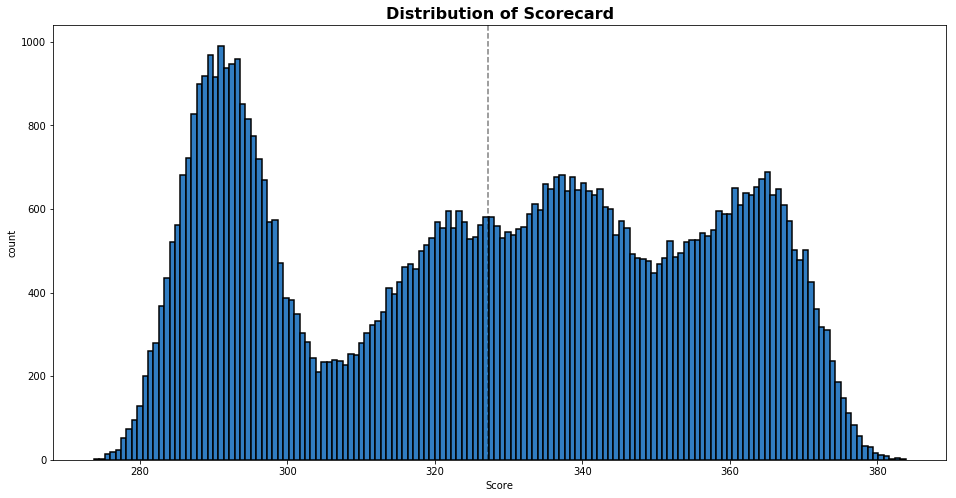

In [169]:
### Plot the Distribution of Final Scorecard with a CutOff Score 
plt.figure(figsize=(16, 8))

plt.hist(finalScorecard['score'],bins=150, edgecolor='black', color='#317DC2', linewidth=1.5)

plt.title('Distribution of Scorecard', fontweight='bold', fontsize=16)
plt.axvline(finalScorecard['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.xlabel('Score')
plt.ylabel('count')


In [170]:
print("Final Cutoff Score is: ",finalScorecard['score'].mean())

Final Cutoff Score is:  327.2118283309716


In [171]:
### Max and Min Score of Approved Candidate
print("Max Score is: ", finalScorecard.score.max())
print("Min Score is: ", finalScorecard.score.min())

Max Score is:  383.82
Min Score is:  273.8


## From the Above Graph we can make out that the CutOff Score is coming out to be about 327,  below which Credit Card should not be granted to applicants.

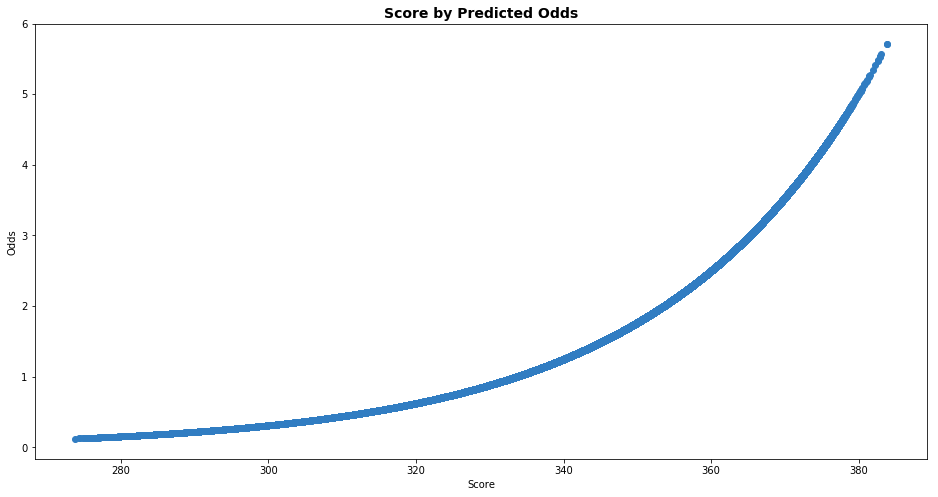

In [172]:
# Plot Scores Against Predicted Odds (Exponential Relationship)
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='odds',
            data=finalScorecard,
            color='#317DC2')

plt.title('Score by Predicted Odds', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Odds');

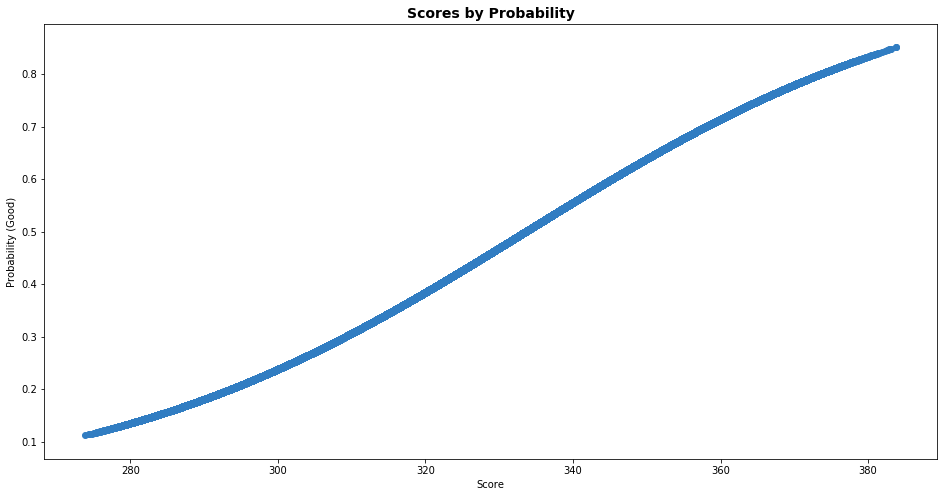

In [173]:
# Plot Scores Against Probabilities
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='probs',
            data=finalScorecard,
            color='#317DC2')

plt.title('Scores by Probability', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Probability (Good)');

### Filtering out Approved Applicants

In [176]:
#### Filter out Approved Applicants
finalScorecard['Performance Tag'] = finalScorecard['Performance Tag'].astype(int)
approvedDF = finalScorecard.loc[finalScorecard['Performance Tag'] == 1]

In [177]:
### Mean Score of Approved Application
print("Mean Score of Approved Applicants is: ", round(approvedDF.score.mean(), 2))

Mean Score of Approved Applicants is:  343.63


In [178]:
### Max and Min Score of Approved Candidate
print("Max Score is: ", approvedDF.score.max())
print("Min Score is: ", approvedDF.score.min())

Max Score is:  383.08
Min Score is:  277.63


Text(0, 0.5, 'count')

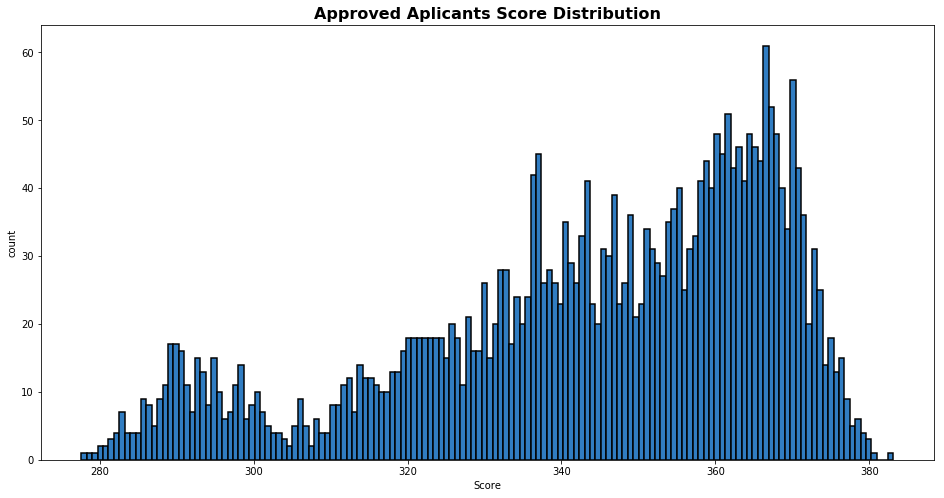

In [179]:
#### Plot Approved Applicants Score Histogram
plt.figure(figsize=(16, 8))

plt.hist(approvedDF['score'],bins=150, edgecolor='black', color='#317DC2', linewidth=1.5)

plt.title('Approved Aplicants Score Distribution', fontweight='bold', fontsize=16)
#plt.axvline(finalScorecard['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.xlabel('Score')
plt.ylabel('count')

### Filtering out Rejected Applicants

In [180]:
#### Filter out Rejected Candidates
rejectedDF = finalScorecard.loc[finalScorecard['Performance Tag'] == 0]

In [181]:
### Print shape of Rejected Candidates
rejectedDF.shape

(66919, 23)

In [182]:
print("Mean Score of Rejected Applicants is: ", round(rejectedDF.score.mean(), 2))

Mean Score of Rejected Applicants is:  326.49


In [183]:
print("Max Score is: ", rejectedDF.score.max())
print("Min Score is: ", rejectedDF.score.min())

Max Score is:  383.82
Min Score is:  273.8


Text(0, 0.5, 'count')

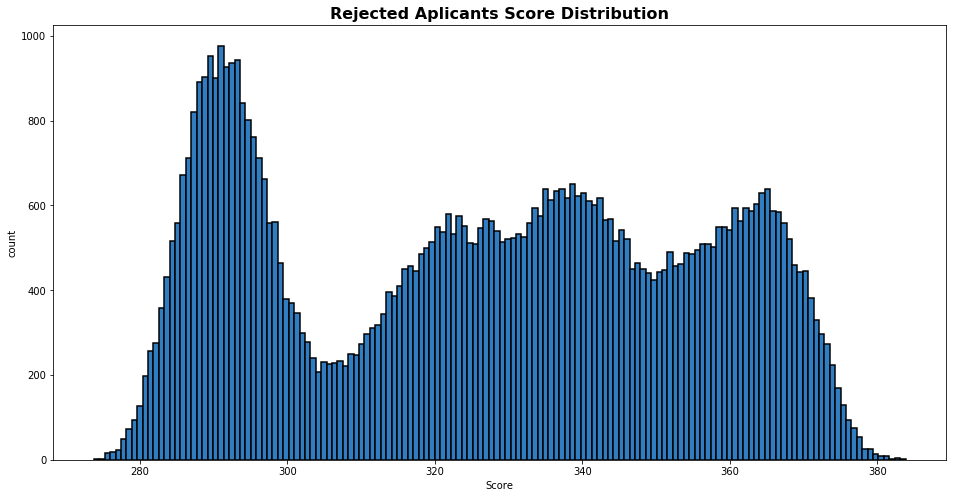

In [184]:
#### Plot Approved Applicants Score Histogram
plt.figure(figsize=(16, 8))

plt.hist(rejectedDF['score'],bins=150, edgecolor='black', color='#317DC2', linewidth=1.5)

plt.title('Rejected Aplicants Score Distribution', fontweight='bold', fontsize=16)
#plt.axvline(finalScorecard['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
plt.xlabel('Score')
plt.ylabel('count')

### We can make out from the above calculation 
======================================================================================================================
###                                                        Complete Dataset
#### Mean Score or the CutOff Score of Complete Dataset: 327.21
#### Max Score :  383.82
#### Min Score :  289.65
======================================================================================================================
###                                                         Approved Candidates
#### Mean Score: 358.26
#### Max Score :  383.82
#### Min Score :  289.65
======================================================================================================================
### Rejected Candidates
#### Mean Score: 314.99
#### Max Score :  377.54
#### Min Score :  273.8

In [185]:
### Making Prediction for the complete Dataset for Financial Analysis using the built LR Model
X = mergedDF.drop("Performance Tag", axis=1)

y = mergedDF['Performance Tag']


Total Accuracy:  0.564916197918903
Recall metric in the testing dataset: 71.20081411126188%
Precision metric in the testing dataset: 97.77859179989011%


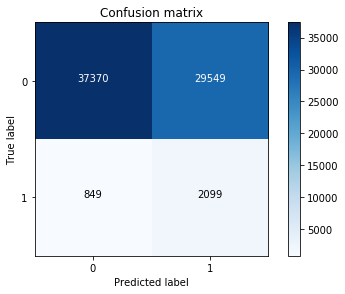

In [186]:
### Making Predcition on the Test Data and Printing the Confusion Matrix
y_pre = lr1.predict(X)

cnf_matrix = confusion_matrix(y, y_pre)

print("Total Accuracy: ", metrics.accuracy_score(y, y_pre))
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [187]:
### Total Defaulters present in the Dataset

y.sum()

2948.0

In [188]:
### As per the Confusion Matrix, correctly identified defaulters are 2099 that means
print("Final percentage of Defaulters correctly identified: ")
2099 / y.sum()

Final percentage of Defaulters correctly identified: 


0.7120081411126187

In [189]:
from scipy.stats import ks_2samp

In [191]:
ks_2samp(rejectedDF['probs'], approvedDF['probs'])

Ks_2sampResult(statistic=0.274525686220667, pvalue=4.125258309024388e-186)